<a href="https://colab.research.google.com/github/AndSiq97/Stock-Price-Return-Time-Series-Analysis-and-Portfolio-Tracking-Optimization/blob/main/Stocks_Price_Return_Time_Series_Analysis_and_Portfolio_Tracking_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
#from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade matplotlib
import matplotlib
import matplotlib.pyplot as plt 
import pandas.util.testing as tm
import pandas_datareader as web_reader
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
# Import more libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime, timedelta
import os

In [3]:
# Uncomment and run this, then comment after and then restart runtime and run this
# !pip install --upgrade pandas-datareader
# !pip install pmdarima

In [4]:
# Get today's date
from datetime import date
today_date = str(date.today())
print("Today's date is: ", str(today_date))

Today's date is:  2021-12-22


## Entering Stocks

In [5]:
import warnings
warnings.filterwarnings("ignore")

stocks = []
adding_stock = True
min_input_stocks = 1
while adding_stock is True:
  add_stock = input("Want to Input Stock Code? (Y/N):    ")
  if add_stock.upper() == 'Y':
    try:
      stock = input("Enter valid stock code: ").upper()
      print('stock: ', stock)
      stock_data = web_reader.DataReader([stock], data_source = 'yahoo', start = '2010-01-01', end = today_date)
    except:
      print("No data fetched for this stock code! Choose another stock code!")
      print("current stocks: ", stocks)
    else:
      if stock not in stocks:
        stocks.append(stock)
        print("current stocks added: ", stocks)
  elif add_stock.upper() == 'N':
    if len(stocks) == 0:
      print("You must enter AT LEAST one stock code!")
    else:
      adding_stock = False
  else:
    print("Not a valid answer! Select Y or N")

Want to Input Stock Code? (Y/N):    y
Enter valid stock code: ry
stock:  RY
current stocks added:  ['RY']
Want to Input Stock Code? (Y/N):    y
Enter valid stock code: nke
stock:  NKE
current stocks added:  ['RY', 'NKE']
Want to Input Stock Code? (Y/N):    n


In [6]:
# Reading CSV file as Pandas DataFrame
df = web_reader.DataReader(stocks, data_source = 'yahoo', start = '2015-01-01', end = today_date)
df.head()

Attributes  Adj Close                 Close  ...       Open     Volume           
Symbols            RY        NKE         RY  ...        NKE         RY        NKE
Date                                         ...                                 
2015-01-02  52.981750  44.105816  68.550003  ...  48.275002   497100.0  4985800.0
2015-01-05  51.861050  43.395714  67.099998  ...  47.255001   931500.0  6889200.0
2015-01-06  51.204094  43.140446  66.250000  ...  46.945000  1110900.0  7576000.0
2015-01-07  51.196365  44.031559  66.239998  ...  46.805000   866500.0  7256000.0
2015-01-08  51.482334  45.047993  66.610001  ...  47.830002   802700.0  5978200.0

[5 rows x 12 columns]

In [7]:
df.tail()

Attributes   Adj Close              ...     Volume            
Symbols             RY         NKE  ...         RY         NKE
Date                                ...                       
2021-12-15  101.470001  163.899994  ...  1370900.0   7144600.0
2021-12-16  102.900002  162.720001  ...  2534700.0   7138100.0
2021-12-17  101.480003  161.360001  ...  2674400.0   7705100.0
2021-12-20  100.430000  156.979996  ...  2160600.0   8411900.0
2021-12-21  101.870003  166.630005  ...  1964700.0  13861400.0

[5 rows x 12 columns]

In [8]:
for stock in stocks:
  df['Prev Close', stock] = df['Close'][stock].shift(1)
  df = df.sort_index(axis=1)

for stock in stocks:
  df['Return', stock] = df['Close'][stock] / df['Prev Close'][stock] - 1
  df = df.sort_index(axis=1)

for stock in stocks:
  df['Log Return', stock] = np.log(df['Return'][stock] + 1)
  df = df.sort_index(axis=1)

for stock in stocks:
  df['Cumulative Return', stock] = (1 + df['Return'][stock]).cumprod() - 1
  df = df.sort_index(axis=1)
  
df.head()

Attributes  Adj Close                 Close  ...    Return     Volume           
Symbols           NKE         RY        NKE  ...        RY        NKE         RY
Date                                         ...                                
2015-01-02  44.105816  52.981750  47.514999  ...       NaN  4985800.0   497100.0
2015-01-05  43.395714  51.861050  46.750000  ... -0.021153  6889200.0   931500.0
2015-01-06  43.140446  51.204094  46.474998  ... -0.012668  7576000.0  1110900.0
2015-01-07  44.031559  51.196365  47.435001  ... -0.000151  7256000.0   866500.0
2015-01-08  45.047993  51.482334  48.529999  ...  0.005586  5978200.0   802700.0

[5 rows x 20 columns]

In [9]:
df.tail()

Attributes   Adj Close                   Close  ...    Return      Volume           
Symbols            NKE          RY         NKE  ...        RY         NKE         RY
Date                                            ...                                 
2021-12-15  163.899994  101.470001  163.899994  ...  0.014497   7144600.0  1370900.0
2021-12-16  162.720001  102.900002  162.720001  ...  0.014093   7138100.0  2534700.0
2021-12-17  161.360001  101.480003  161.360001  ... -0.013800   7705100.0  2674400.0
2021-12-20  156.979996  100.430000  156.979996  ... -0.010347   8411900.0  2160600.0
2021-12-21  166.630005  101.870003  166.630005  ...  0.014338  13861400.0  1964700.0

[5 rows x 20 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1756 entries, 2015-01-02 to 2021-12-21
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, NKE)          1756 non-null   float64
 1   (Adj Close, RY)           1756 non-null   float64
 2   (Close, NKE)              1756 non-null   float64
 3   (Close, RY)               1756 non-null   float64
 4   (Cumulative Return, NKE)  1755 non-null   float64
 5   (Cumulative Return, RY)   1755 non-null   float64
 6   (High, NKE)               1756 non-null   float64
 7   (High, RY)                1756 non-null   float64
 8   (Log Return, NKE)         1755 non-null   float64
 9   (Log Return, RY)          1755 non-null   float64
 10  (Low, NKE)                1756 non-null   float64
 11  (Low, RY)                 1756 non-null   float64
 12  (Open, NKE)               1756 non-null   float64
 13  (Open, RY)                1756 non-null   flo

In [11]:
df = df.reset_index()

In [12]:
# Checking size/shape of DataFrame
df.shape

(1756, 21)

In [13]:
df.describe()

Attributes    Adj Close               ...        Volume              
Symbols             NKE           RY  ...           NKE            RY
count       1756.000000  1756.000000  ...  1.756000e+03  1.756000e+03
mean          80.877313    66.032680  ...  7.819991e+06  1.087009e+06
std           34.731138    15.877002  ...  4.312227e+06  6.554391e+05
min           42.314304    36.413193  ...  1.821900e+06  1.964000e+05
25%           53.369761    52.136837  ...  5.367400e+06  6.820000e+05
50%           70.014584    66.621166  ...  6.868350e+06  9.121500e+05
75%           95.344296    72.208633  ...  8.782975e+06  1.301475e+06
max          177.191528   107.059998  ...  5.731940e+07  9.830200e+06

[8 rows x 20 columns]

In [14]:
# Checking number of NULL values in ENTIRE DataFrame
# Note it's okay here because of Prev Close and Log Return/Return columns are shifted by 1 for each Stock 
df.isnull().sum().sum()

8

## Stock Close Prices

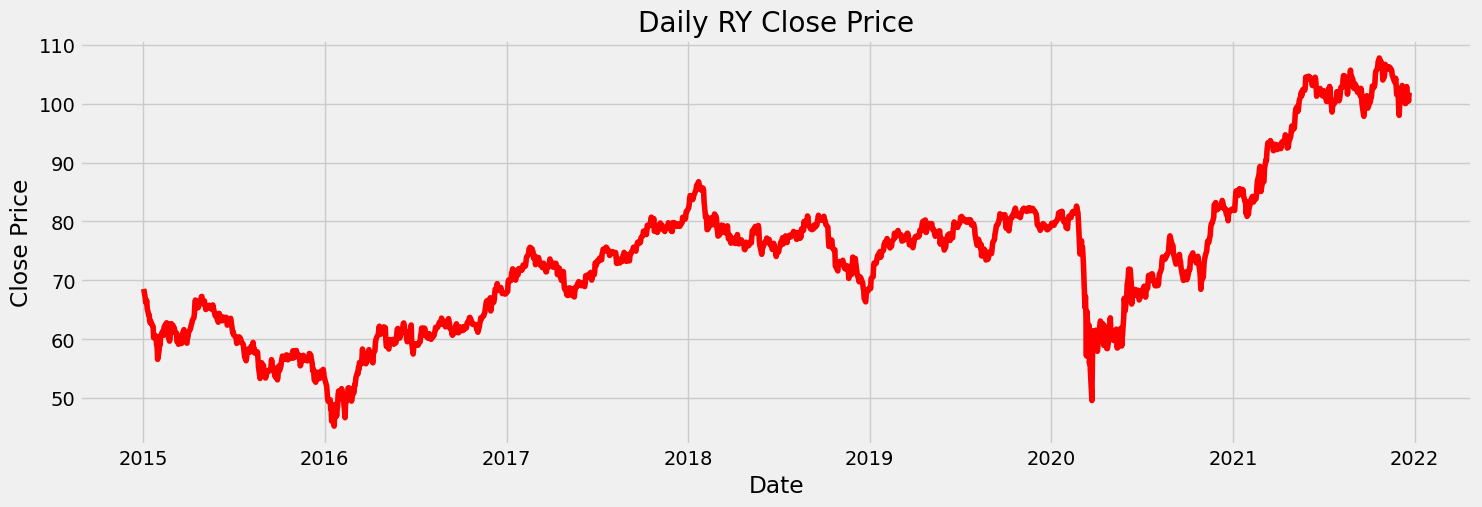

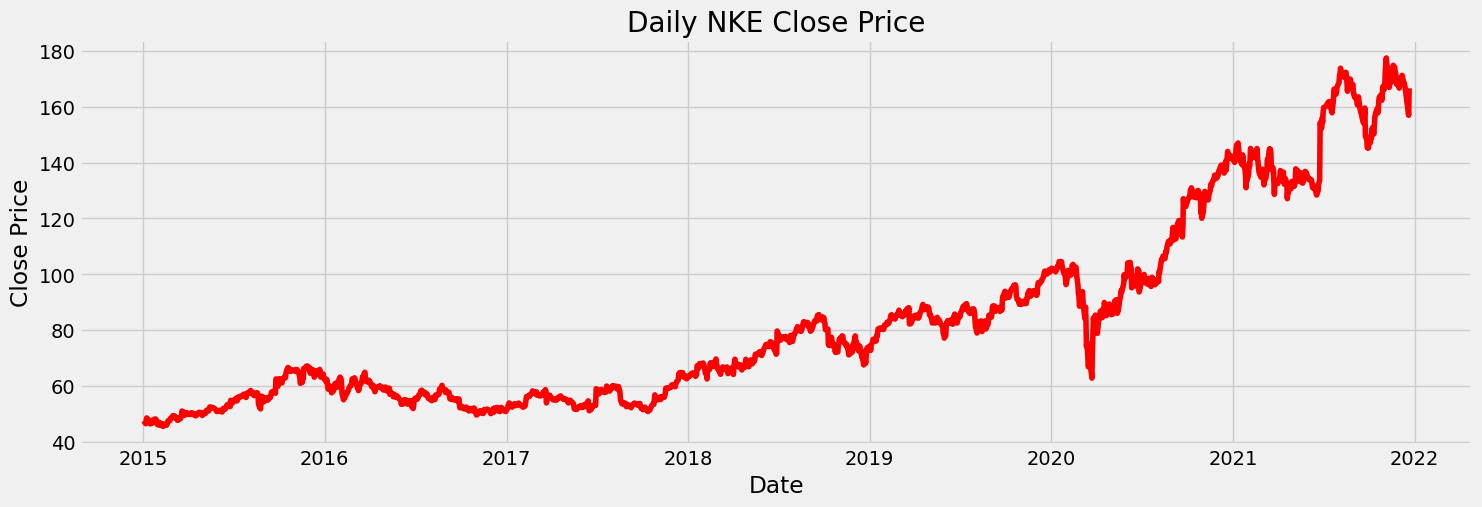

In [15]:
for stock in stocks:
  plt.figure(figsize=(16,5), dpi=100)
  plt.plot(df['Date'], df['Close'][stock], color='red')
  title = 'Daily ' + stock + ' Close Price'
  plt.gca().set(title=title, 
                xlabel='Date', ylabel='Close Price')
  plt.show()

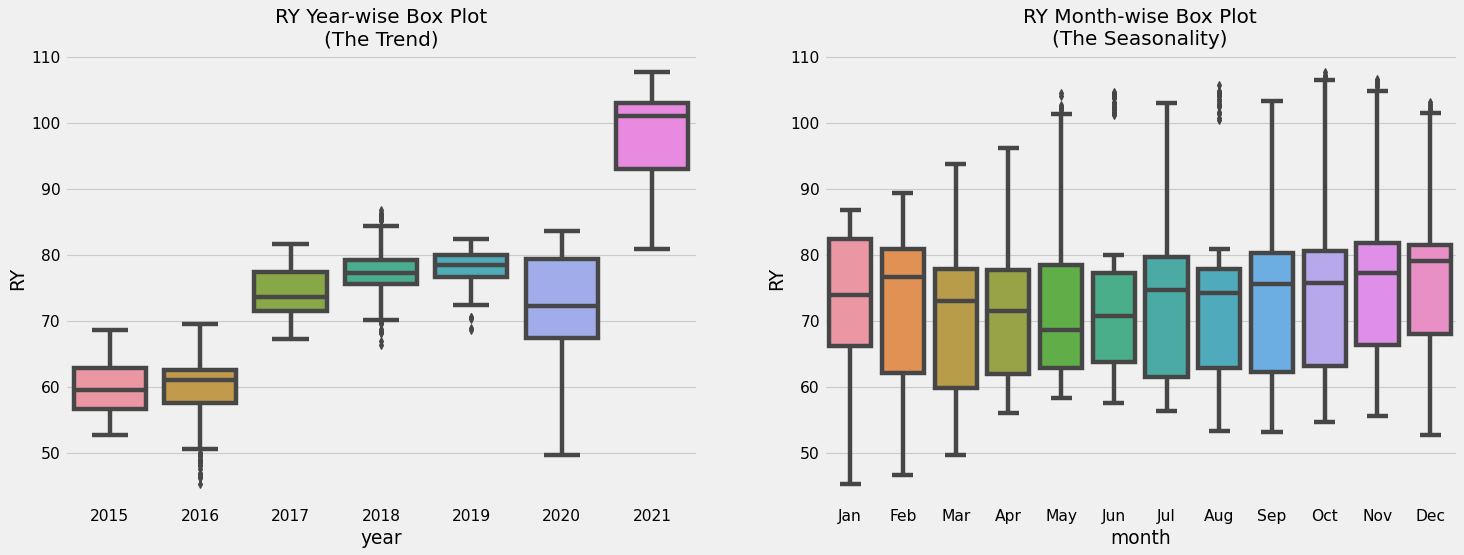

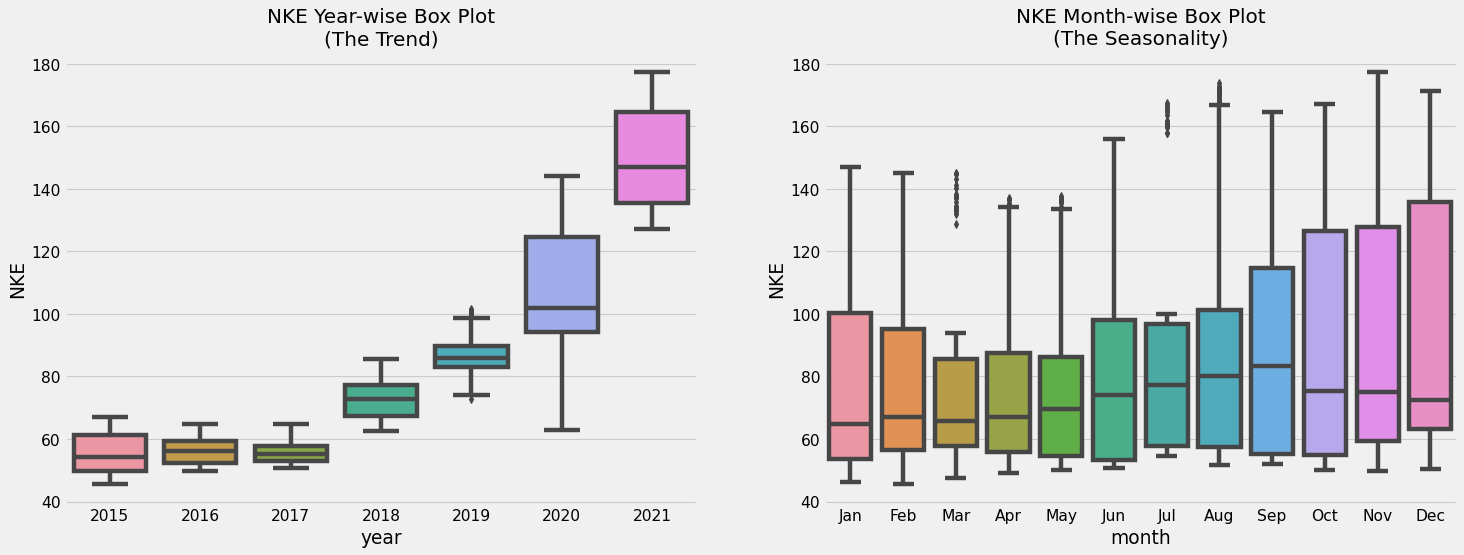

In [16]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

for stock in stocks:
  fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
  sns.boxplot(x=df['year'], y=df['Close'][stock], ax=axes[0])
  sns.boxplot(x=df['month'], y=df['Close'][stock], data=df['Close'].loc[~df.year.isin([2010, 2021]), :])

  axes_0_title = stock + ' Year-wise Box Plot\n(The Trend)'
  axes_1_title = stock + ' Month-wise Box Plot\n(The Seasonality)'
  axes[0].set_title(axes_0_title, fontsize=18); 
  axes[1].set_title(axes_1_title, fontsize=18)
  plt.show()

In [17]:
stocks_prices = df["Close"]
for stock in stocks:
  new_col_name = stock + " Prices"
  stocks_prices.rename({stock: new_col_name}, axis=1, inplace=True)
stocks_prices.head()

Symbols  NKE Prices  RY Prices
0         47.514999  68.550003
1         46.750000  67.099998
2         46.474998  66.250000
3         47.435001  66.239998
4         48.529999  66.610001

In [18]:
# Correlation matrix between All Stock Prices
stocks_prices.corr()

Symbols     NKE Prices  RY Prices
Symbols                          
NKE Prices    1.000000   0.783276
RY Prices     0.783276   1.000000

In [19]:
# Covariance matrix between All Stock Prices
stocks_prices.cov()

Symbols      NKE Prices   RY Prices
Symbols                            
NKE Prices  1145.443834  346.110010
RY Prices    346.110010  170.460748

## Stock Cumulative Returns 

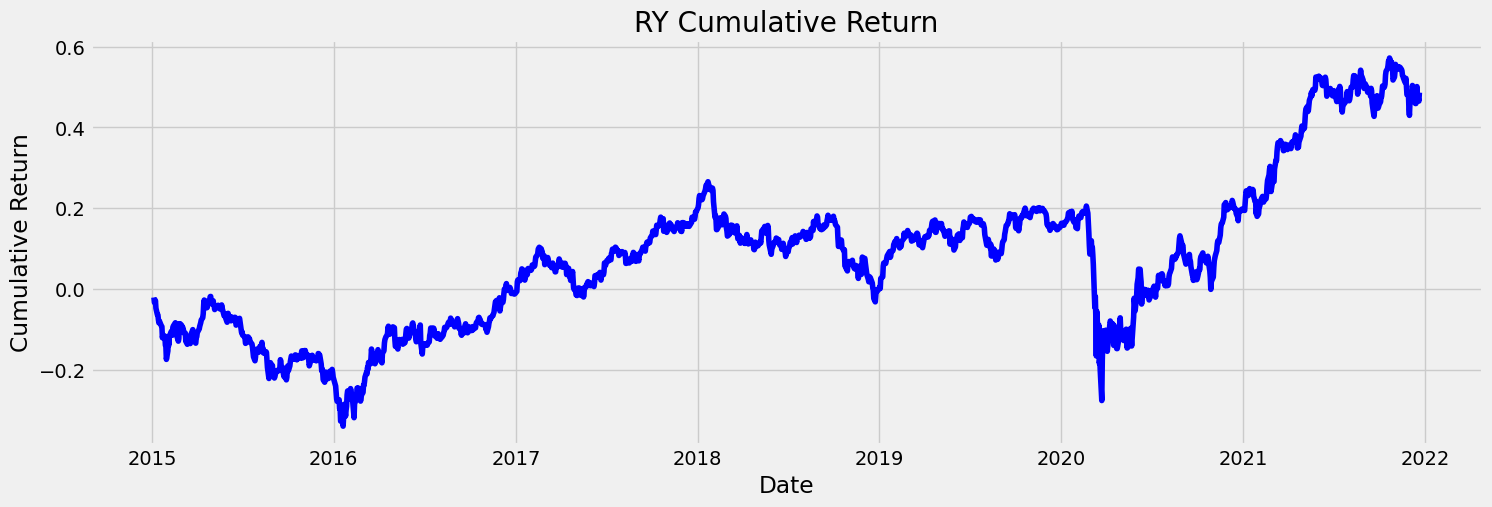

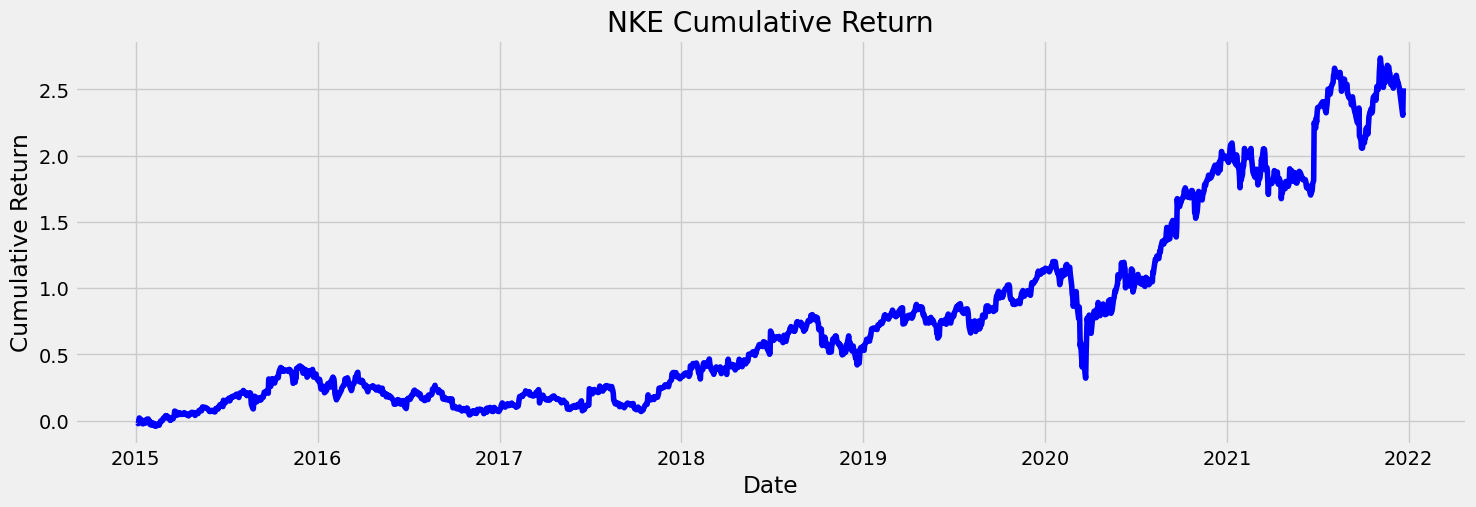

In [20]:
for stock in stocks:
  plt.figure(figsize=(16,5), dpi=100)
  plt.plot(df['Date'], df['Cumulative Return'][stock], color='blue')
  title = stock + ' Cumulative Return'
  plt.gca().set(title=title, 
                xlabel='Date', ylabel='Cumulative Return')
  plt.show()

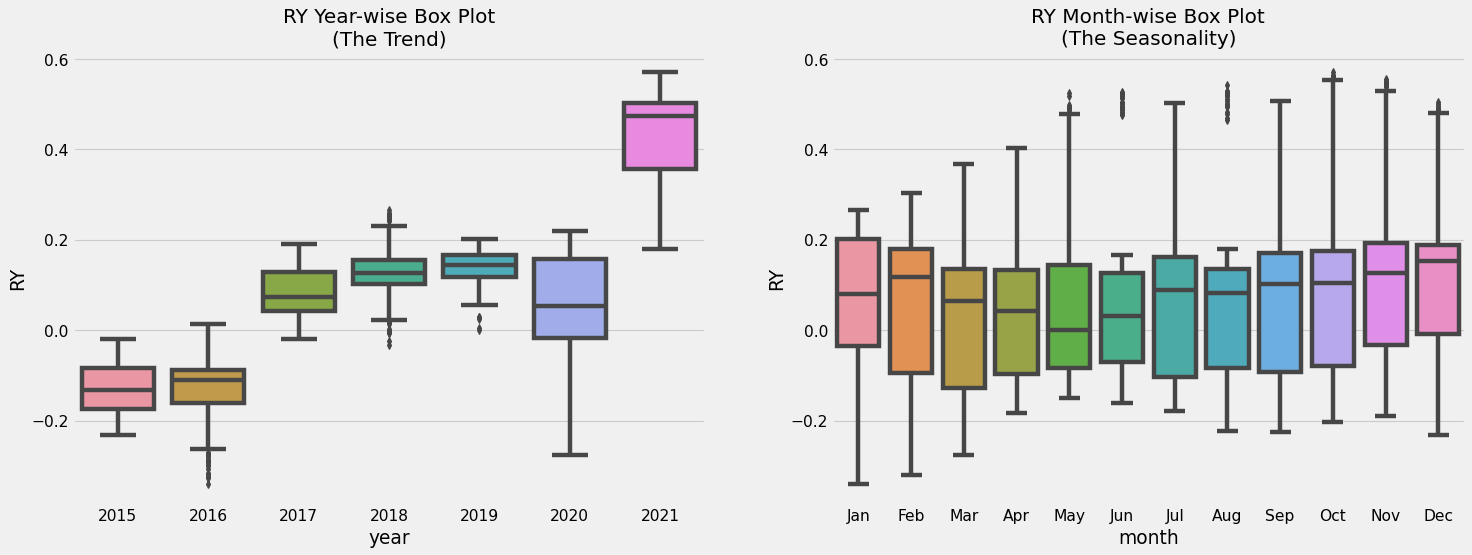

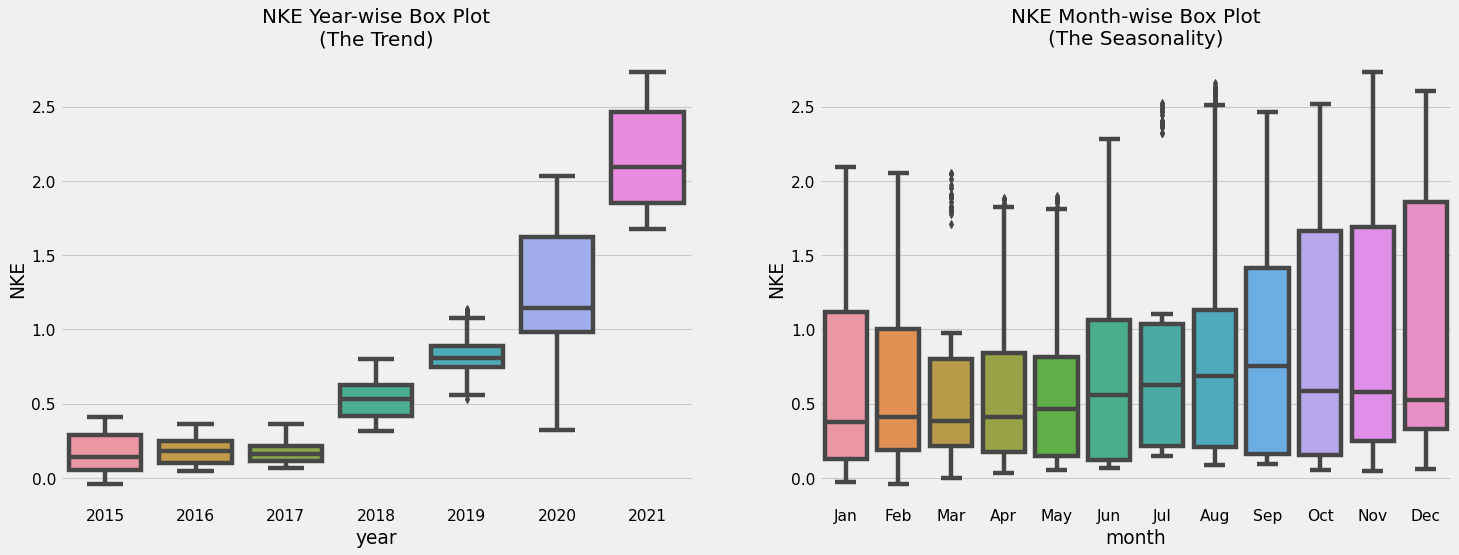

In [21]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

for stock in stocks:
  fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
  sns.boxplot(x=df['year'], y=df['Cumulative Return'][stock], ax=axes[0])
  sns.boxplot(x=df['month'], y=df['Cumulative Return'][stock], data=df['Cumulative Return'].loc[~df.year.isin([2010, 2021]), :])

  axes_0_title = stock + ' Year-wise Box Plot\n(The Trend)'
  axes_1_title = stock + ' Month-wise Box Plot\n(The Seasonality)'
  axes[0].set_title(axes_0_title, fontsize=18); 
  axes[1].set_title(axes_1_title, fontsize=18)
  plt.show()

In [22]:
stocks_cumulative_returns = df["Cumulative Return"]
for stock in stocks:
  new_col_name = stock + " Cumulative Returns"
  stocks_cumulative_returns.rename({stock: new_col_name}, axis=1, inplace=True)
stocks_cumulative_returns.head()

Symbols  NKE Cumulative Returns  RY Cumulative Returns
0                           NaN                    NaN
1                     -0.016100              -0.021153
2                     -0.021888              -0.033552
3                     -0.001684              -0.033698
4                      0.021362              -0.028301

In [23]:
# Correlation matrix between All Stock Cumulative Returns
stocks_cumulative_returns.corr()

Symbols                 NKE Cumulative Returns  RY Cumulative Returns
Symbols                                                              
NKE Cumulative Returns                1.000000               0.783313
RY Cumulative Returns                 0.783313               1.000000

In [24]:
# Covariance matrix between All Stock Cumulative Returns
stocks_cumulative_returns.cov()

Symbols                 NKE Cumulative Returns  RY Cumulative Returns
Symbols                                                              
NKE Cumulative Returns                0.507325               0.106288
RY Cumulative Returns                 0.106288               0.036292

In [25]:
class t_qqplot:
  def __init__(self, data):
      self.data = data
  
  def fit(self, x):
    return t.fit(x)

  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.data, loc, scale)

## Market (S&P 500 ETF)

In [26]:
# SPY (Market)
spy_market = web_reader.DataReader(['SPY'], data_source = 'yahoo', start = '2015-01-01', end = today_date)
spy_market.head()

Attributes   Adj Close       Close  ...        Open       Volume
Symbols            SPY         SPY  ...         SPY          SPY
Date                                ...                         
2015-01-02  180.341476  205.429993  ...  206.380005  121465900.0
2015-01-05  177.084579  201.720001  ...  204.169998  169632600.0
2015-01-06  175.416641  199.820007  ...  202.089996  209151400.0
2015-01-07  177.602524  202.309998  ...  201.419998  125346700.0
2015-01-08  180.754105  205.899994  ...  204.009995  147217800.0

[5 rows x 6 columns]

In [27]:
spy_market.tail()

Attributes   Adj Close       Close  ...        Open       Volume
Symbols            SPY         SPY  ...         SPY          SPY
Date                                ...                         
2021-12-15  468.949463  470.600006  ...  463.420013  116899300.0
2021-12-16  464.814026  466.450012  ...  472.570007  116568600.0
2021-12-17  459.869995  459.869995  ...  461.549988  135511600.0
2021-12-20  454.980011  454.980011  ...  454.480011  107134800.0
2021-12-21  463.059998  463.059998  ...  458.609985   69684700.0

[5 rows x 6 columns]

In [28]:
spy_market['Prev Close', 'SPY'] = spy_market['Close']['SPY'].shift(1)
spy_market = spy_market.sort_index(axis=1)

spy_market['Return', 'SPY'] = spy_market['Close']['SPY'] / spy_market['Prev Close']['SPY'] - 1
spy_market = spy_market.sort_index(axis=1)

spy_market['Log Return', 'SPY'] = np.log(spy_market['Return']['SPY'] + 1)
spy_market = spy_market.sort_index(axis=1)
  
spy_market.head()

Attributes   Adj Close       Close  ...    Return       Volume
Symbols            SPY         SPY  ...       SPY          SPY
Date                                ...                       
2015-01-02  180.341476  205.429993  ...       NaN  121465900.0
2015-01-05  177.084579  201.720001  ... -0.018060  169632600.0
2015-01-06  175.416641  199.820007  ... -0.009419  209151400.0
2015-01-07  177.602524  202.309998  ...  0.012461  125346700.0
2015-01-08  180.754105  205.899994  ...  0.017745  147217800.0

[5 rows x 9 columns]

In [29]:
spy_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1756 entries, 2015-01-02 to 2021-12-21
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, SPY)   1756 non-null   float64
 1   (Close, SPY)       1756 non-null   float64
 2   (High, SPY)        1756 non-null   float64
 3   (Log Return, SPY)  1755 non-null   float64
 4   (Low, SPY)         1756 non-null   float64
 5   (Open, SPY)        1756 non-null   float64
 6   (Prev Close, SPY)  1755 non-null   float64
 7   (Return, SPY)      1755 non-null   float64
 8   (Volume, SPY)      1756 non-null   float64
dtypes: float64(9)
memory usage: 137.2 KB


In [30]:
# Checking size/shape of DataFrame
spy_market.shape

(1756, 9)

In [31]:
spy_market = spy_market.reset_index()

In [32]:
spy_market.describe()

Attributes    Adj Close        Close  ...       Return        Volume
Symbols             SPY          SPY  ...          SPY           SPY
count       1756.000000  1756.000000  ...  1755.000000  1.756000e+03
mean         266.528310   281.165473  ...     0.000526  9.160475e+07
std           78.579852    72.191503  ...     0.011203  4.953370e+07
min          163.840469   182.860001  ...    -0.109424  2.027000e+07
25%          196.638767   216.647495  ...    -0.003390  5.911925e+07
50%          254.673073   270.470001  ...     0.000603  7.776455e+07
75%          302.801575   312.019989  ...     0.005452  1.072196e+08
max          469.088959   470.739990  ...     0.090603  5.072443e+08

[8 rows x 9 columns]

In [33]:
# Checking number of NULL values in ENTIRE DataFrame
# Note it's okay here because of Prev Close and Log Return/Return columns are shifted by 1 for each Stock 
spy_market.isnull().sum().sum()

3

## Stock Returns (Day to Day)

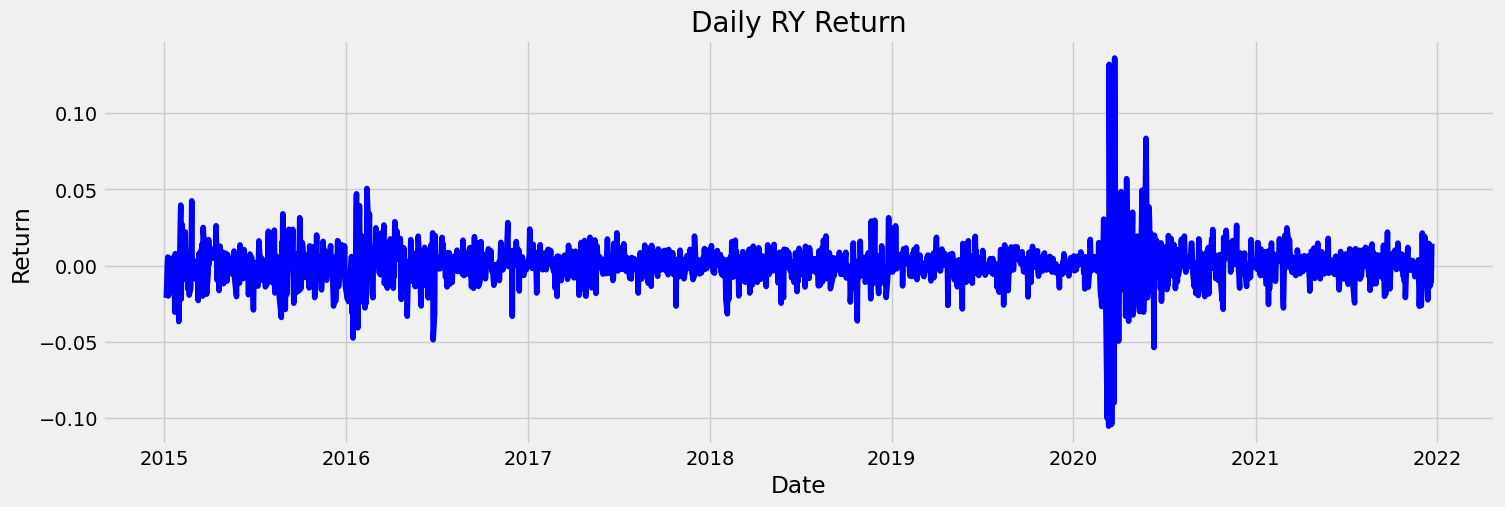

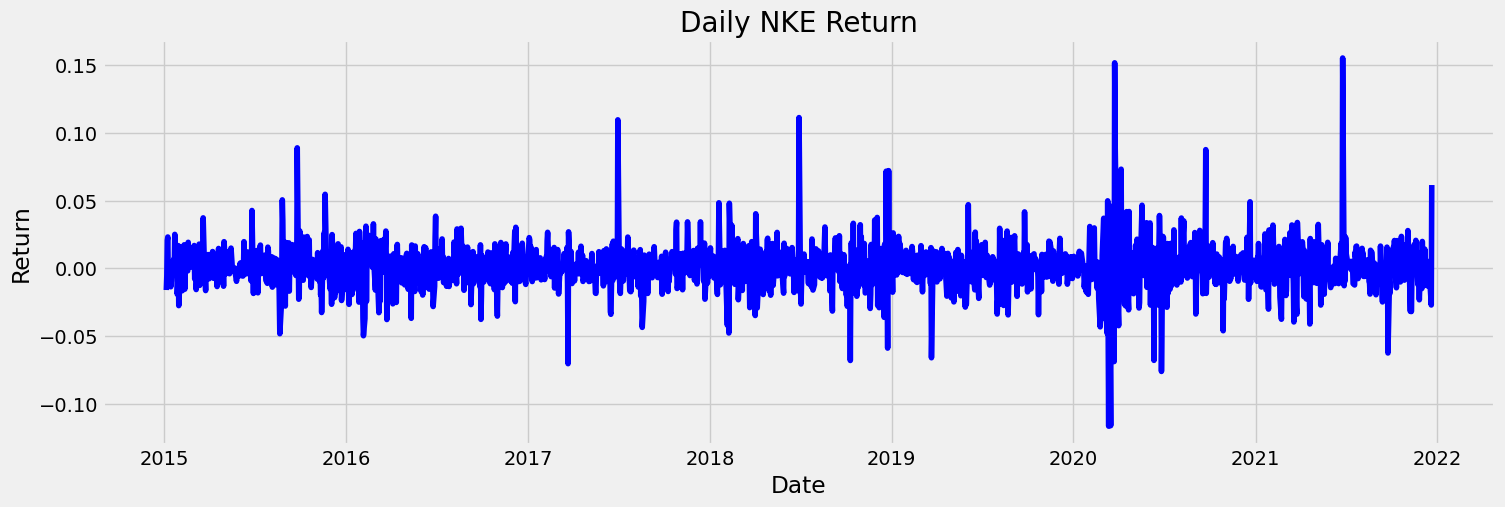

In [34]:
for stock in stocks:
  plt.figure(figsize=(16,5), dpi=100)
  plt.plot(df['Date'], df['Return'][stock], color='blue')
  title = 'Daily ' + stock + ' Return'
  plt.gca().set(title=title, 
                xlabel='Date', ylabel='Return')
  plt.show()

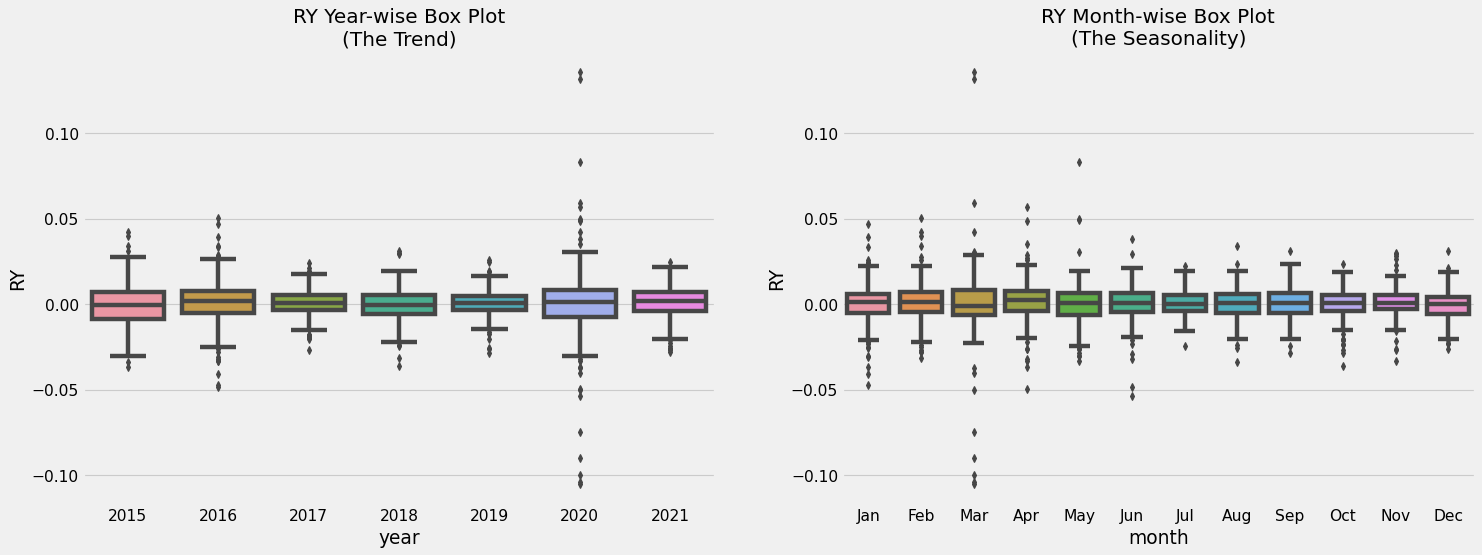

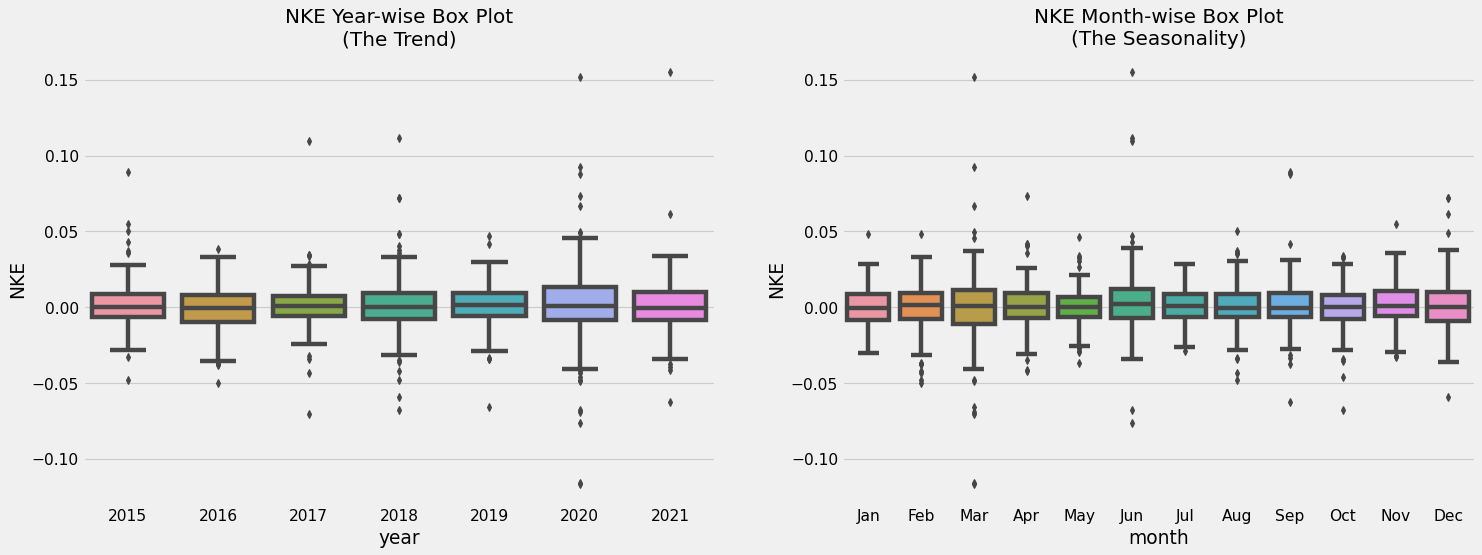

In [35]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

for stock in stocks:
  # Draw Plot
  fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
  sns.boxplot(x=df['year'], y=df['Return'][stock], ax=axes[0])
  sns.boxplot(x=df['month'], y=df['Return'][stock], data=df['Return'].loc[~df.year.isin([2010, 2021]), :])

  axes_0_title = stock + ' Year-wise Box Plot\n(The Trend)'
  axes_1_title = stock + ' Month-wise Box Plot\n(The Seasonality)'
  axes[0].set_title(axes_0_title, fontsize=18); 
  axes[1].set_title(axes_1_title, fontsize=18)
  plt.show()

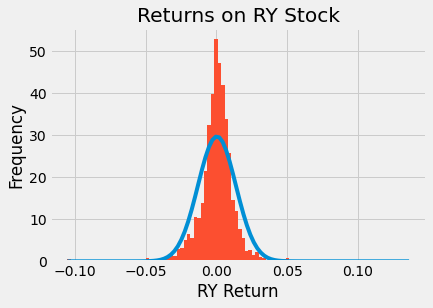

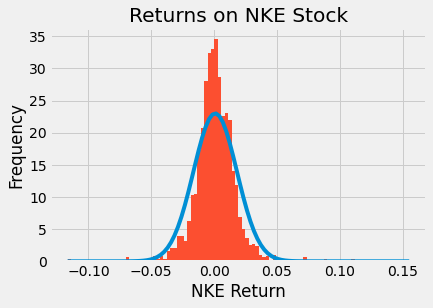

In [36]:
from scipy.stats import norm 

for stock in stocks:
  x_list = np.linspace(df["Return"][stock].min(), df["Return"][stock].max(), 100)
  y_list = norm.pdf(x_list, loc = df["Return"][stock].mean(), scale = df["Return"][stock].std())
  plt.plot(x_list, y_list)
  df["Return"][stock].hist(bins = 100, density = True)
  title = "Returns on " + stock + " Stock"
  x_axis = stock + " Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.show()

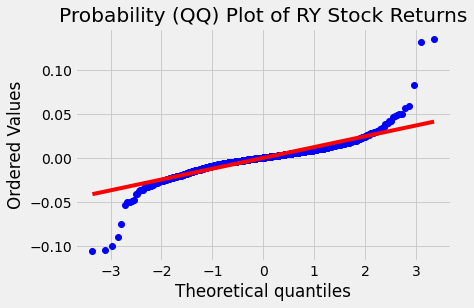

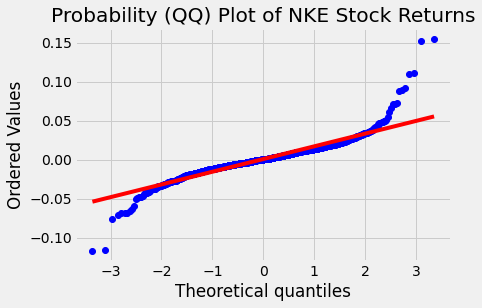

In [37]:
from scipy.stats import probplot

for stock in stocks:
  probplot(df["Return"][stock].dropna(), dist = "norm", fit = True, plot = plt)
  title = "Probability (QQ) Plot of " + stock + " Stock Returns"
  plt.title(title)
  plt.show()

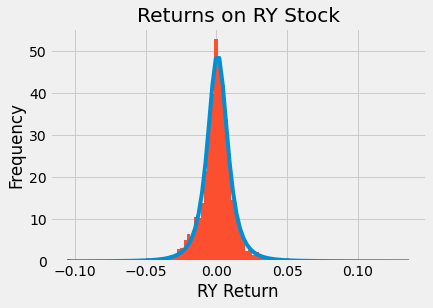

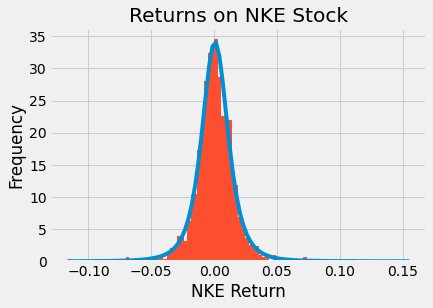

In [38]:
from scipy.stats import t

for stock in stocks:
  x_list = np.linspace(df["Return"][stock].min(), df["Return"][stock].max(), 100)
  params = t.fit(df["Return"][stock].dropna())
  dataf, loc, scale = params
  y_list = t.pdf(x_list, dataf, loc, scale)
  plt.plot(x_list, y_list)
  df["Return"][stock].hist(bins = 100, density = True)
  title = "Returns on " + stock + " Stock"
  x_axis = stock + " Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.show()

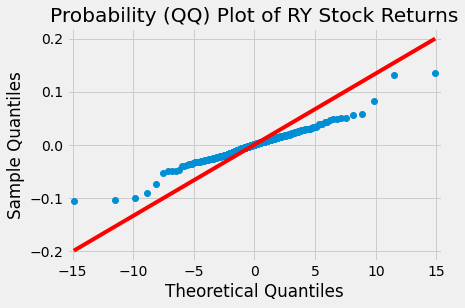

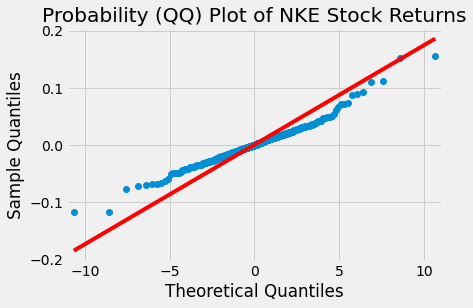

In [39]:
import statsmodels.api as sm
for stock in stocks:
  params = t.fit(df["Return"][stock].dropna())
  dataf, loc, scale = params
  sm.qqplot(df["Return"][stock].dropna(), dist = t_qqplot(dataf), line = 's')
  title = "Probability (QQ) Plot of " + stock + " Stock Returns"
  plt.title(title)
  plt.show()

In [40]:
# Sample Skewness and Kurtosis for Each Stock Returns
for stock in stocks:
  print("Sample Skewness of " + stock + " Returns is: ", df["Return"][stock].skew())
  print("Kurtosis of " + stock + " Returns is: ", df["Return"][stock].kurtosis())
  print("                                                                  ")

Sample Skewness of RY Returns is:  0.18743821408532135
Kurtosis of RY Returns is:  20.137855617511928
                                                                  
Sample Skewness of NKE Returns is:  0.799930888136361
Kurtosis of NKE Returns is:  12.941522231946763
                                                                  


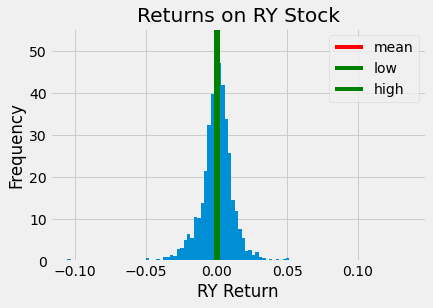

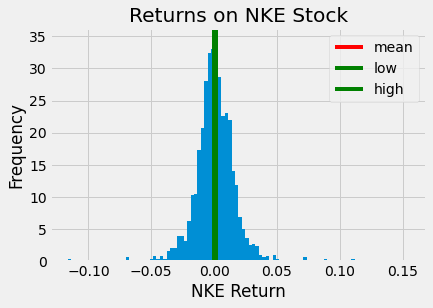

In [41]:
# Confidence Intervals of Stock Returns
for stock in stocks:
  values = df["Return"][stock].dropna().to_numpy()
  mean = values.mean()
  std = values.std(ddof = 1)

  low = mean - 1.96 * std / np.sqrt(len(values))
  high = mean + 1.96 * std / np.sqrt(len(values))

  df["Return"][stock].hist(bins = 100, density = True)
  title = "Returns on " + stock + " Stock"
  x_axis = stock + " Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.axvline(mean, label = 'mean', color = 'red')
  plt.axvline(low, label = 'low', color = 'green')
  plt.axvline(high, label = 'high', color = 'green')
  plt.legend()
  plt.show()

In [42]:
# Statistical Hypothesis Testing on Stock Returns
from scipy.stats import jarque_bera, normaltest

for stock in stocks:
  values = df["Return"][stock].dropna().to_numpy()
  print("Testing for Normality of " + stock + " Stock Returns: ", jarque_bera(values))
  print("Testing for Normality of " + stock + " Stock Returns: ", normaltest(values))
  print("                                                                  ")

Testing for Normality of RY Stock Returns:  (29486.245408783136, 0.0)
Testing for Normality of RY Stock Returns:  NormaltestResult(statistic=454.8279150562349, pvalue=1.719385016413948e-99)
                                                                  
Testing for Normality of NKE Stock Returns:  (12357.964479436534, 0.0)
Testing for Normality of NKE Stock Returns:  NormaltestResult(statistic=511.4233937327927, pvalue=8.82716191425148e-112)
                                                                  


In [43]:
from scipy.stats import kstest

# for stock in stocks:
#   values = df["Return"][stock].dropna().to_numpy()
#   dataf, loc, scale = t.fit(values)
#   print("Testing for Normality of " + stock + " Stock Returns: ", kstest(values, 
#                                                                          t.cdf(x, dataf, loc, scale)))
#   print("                                                                  ")

In [44]:
from scipy.stats import ttest_1samp

for stock in stocks:
  values = df["Return"][stock].dropna().to_numpy()
  print("One Sample t-test of " + stock + " Stock Returns: ", ttest_1samp(values, 0))
  print("                                                                  ")

One Sample t-test of RY Stock Returns:  Ttest_1sampResult(statistic=0.9855150134204084, pvalue=0.3245070825516939)
                                                                  
One Sample t-test of NKE Stock Returns:  Ttest_1sampResult(statistic=2.088594042831821, pvalue=0.036888154850498976)
                                                                  


In [45]:
# Confidence Intervals of Stock Returns
# for stock in stocks:
#   values = df["Return"][stock].dropna().to_numpy()
#   mean = values.mean()
#   std = values.std(ddof = 1)

#   low = mean - 1.96 * std / np.sqrt(len(values))
#   high = mean + 1.96 * std / np.sqrt(len(values))

#   title = "Returns on " + stock + " Stock"
#   x_axis = stock + " Return"
#   y_axis = "Frequency"
#   plt.xlabel(x_axis)
#   plt.ylabel(y_axis)
#   plt.title(title)
#   plt.axvline(mean, label = 'mean', color = 'red')
#   plt.axvline(low, label = 'low', color = 'green')
#   plt.axvline(high, label = 'high', color = 'green')
#   plt.legend()
#   plt.show()

In [46]:
stocks_returns = df["Return"]
for stock in stocks:
  new_col_name = stock + " Returns"
  stocks_returns.rename({stock: new_col_name}, axis=1, inplace=True)
stocks_returns.head()

Symbols  NKE Returns  RY Returns
0                NaN         NaN
1          -0.016100   -0.021153
2          -0.005882   -0.012668
3           0.020656   -0.000151
4           0.023084    0.005586

In [47]:
print("The Return Means of ALL stocks is: ")
print("                                   ")
stocks_returns.mean()

The Return Means of ALL stocks is: 
                                   


Symbols
NKE Returns    0.000864
RY Returns     0.000316
dtype: float64

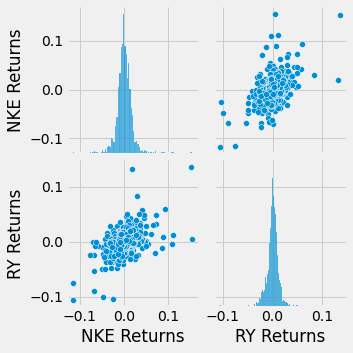

In [48]:
sns.pairplot(stocks_returns)

Text(0.5, 1.0, 'Relationship Between Volatility and Return for All Stocks')

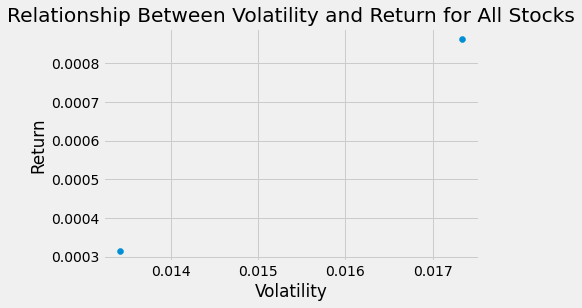

In [49]:
plt.scatter(stocks_returns.std(), stocks_returns.mean())
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Relationship Between Volatility and Return for All Stocks")

In [50]:
# Correlation matrix between All Stock Returns
stocks_returns.corr()

Symbols      NKE Returns  RY Returns
Symbols                             
NKE Returns     1.000000    0.465903
RY Returns      0.465903    1.000000

In [51]:
# Covariance matrix between All Stock Returns
stocks_returns.cov()

Symbols      NKE Returns  RY Returns
Symbols                             
NKE Returns     0.000300    0.000108
RY Returns      0.000108    0.000180

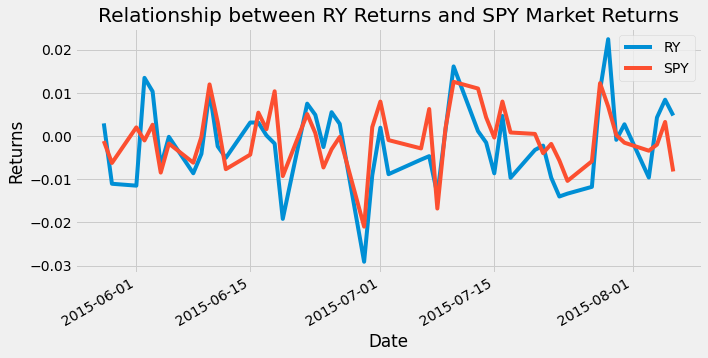

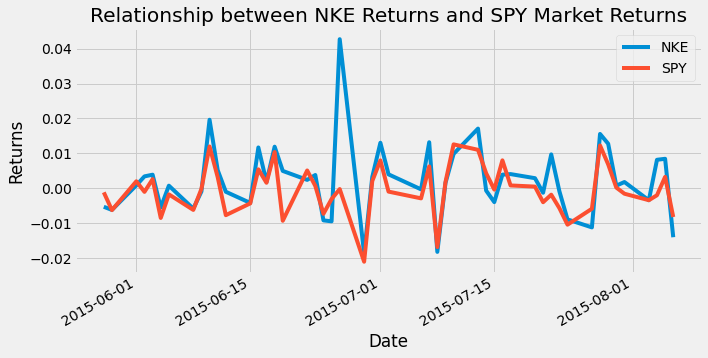

In [52]:
df.set_index('Date', inplace=True)
spy_market.set_index('Date', inplace=True)
for stock in stocks:
  joined = pd.concat([pd.DataFrame(df["Return"][stock]), pd.DataFrame(spy_market["Return"]["SPY"])], axis=1)
  joined.iloc[100:150].plot(figsize = (10,5))
  title = "Relationship between " + stock + " Returns and SPY Market Returns"
  x_axis = "Date"
  y_axis = "Returns"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)

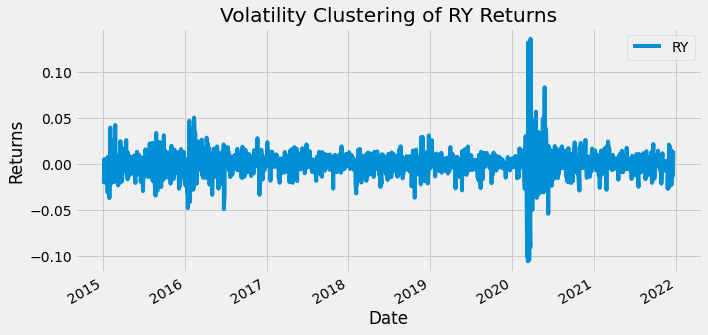

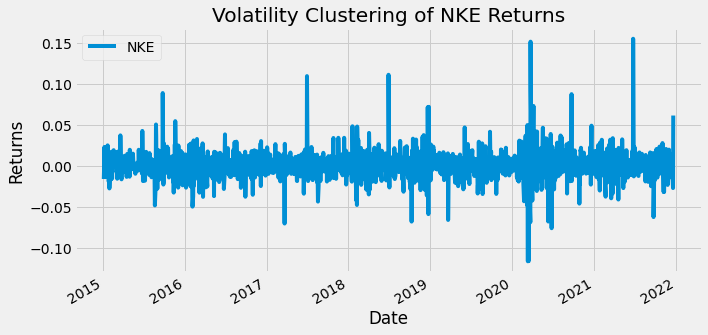

In [53]:
for stock in stocks:
  returns = pd.DataFrame(df["Return"][stock])
  returns.plot(figsize = (10,5))
  title = "Volatility Clustering of " + stock + " Returns"
  x_axis = "Date"
  y_axis = "Returns"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)

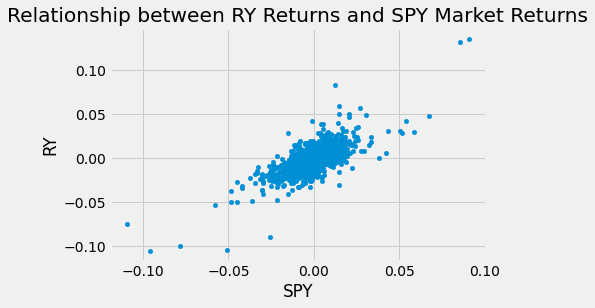

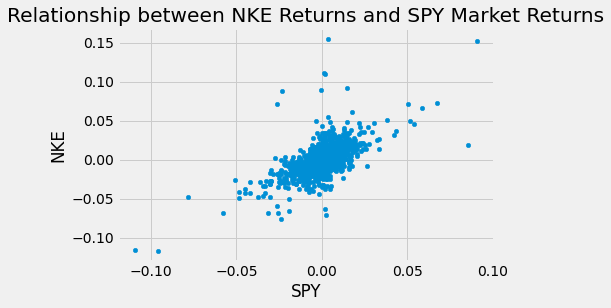

In [54]:
for stock in stocks:
  joined = pd.concat([pd.DataFrame(df["Return"][stock]), pd.DataFrame(spy_market["Return"]["SPY"])], axis=1)
  joined.plot.scatter('SPY', stock)
  title = "Relationship between " + stock + " Returns and SPY Market Returns"
  x_axis = "SPY"
  y_axis = stock
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)

RY Alpha is:  [[0.60251336]]
RY Beta is:  [0.00033604]
                                    
                                    
Standard Deviation between RY and SPY Market is: 
RY     0.013424
SPY    0.011203
dtype: float64
                                    
                                    


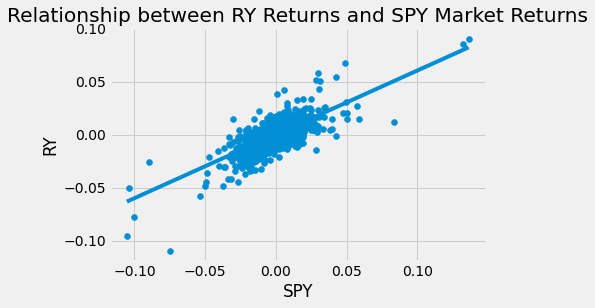

NKE Alpha is:  [[0.40775458]]
NKE Beta is:  [0.00017395]
                                    
                                    
Standard Deviation between NKE and SPY Market is: 
NKE    0.017333
SPY    0.011203
dtype: float64
                                    
                                    


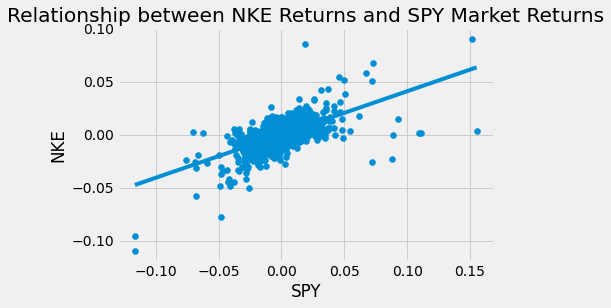

In [55]:
for stock in stocks:
    joined = pd.concat([pd.DataFrame(df["Return"][stock]), pd.DataFrame(spy_market["Return"]["SPY"])], axis=1)
    joined.dropna(inplace=True)
    X = joined[[stock]].to_numpy()
    Y = joined[["SPY"]].to_numpy()
    model = LinearRegression()
    model.fit(X, Y)
    X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1,1)
    Y_predict = model.predict(X_predict)
    plt.scatter(X, Y)
    plt.plot(X_predict, Y_predict)
    title = "Relationship between " + stock + " Returns and SPY Market Returns"
    x_axis = "SPY"
    y_axis = stock
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    print(stock + " Alpha is: ", model.coef_)
    print(stock + " Beta is: ", model.intercept_)
    print("                                    ")
    print("                                    ")
    print("Standard Deviation between " + stock + " and SPY Market is: ")
    print(joined.std())
    print("                                    ")
    print("                                    ")
    plt.show()

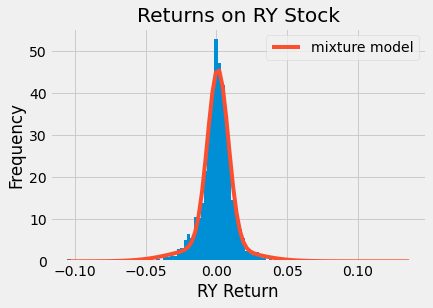

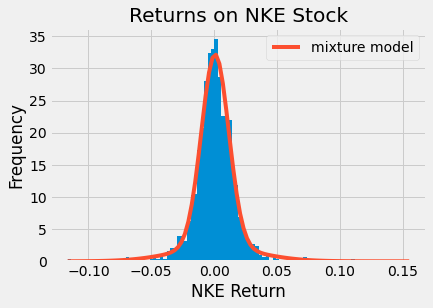

In [56]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

for stock in stocks:
  dataf = df["Return"][stock].dropna().to_numpy().reshape(-1,1)
  model = GaussianMixture(n_components=2)
  model.fit(dataf)
  weights = model.weights_
  means = model.means_
  means = means.flatten()
  cov = model.covariances_
  var = cov.flatten()
  
  x_list = np.linspace(dataf.min(), dataf.max(), 100)
  fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
  fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
  fx = weights[0] * fx0 + weights[1] * fx1

  df["Return"][stock].hist(bins = 100, density = True)
  title = "Returns on " + stock + " Stock"
  x_axis = stock + " Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.plot(x_list, fx, label = 'mixture model')
  plt.legend()
  plt.show()

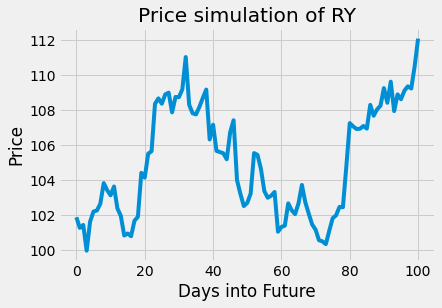

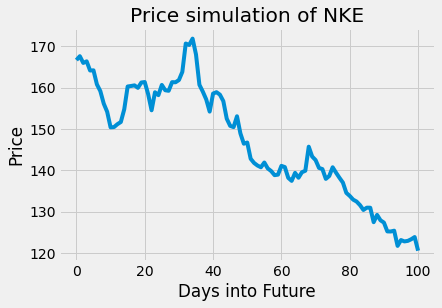

In [57]:
# Price Simulation of Stock Returns
for stock in stocks:
  p0 = df.iloc[-1]["Close"][stock]
  prices = [p0]
  returns = df["Return"][stock].dropna()
  for _ in range(100):
    r = np.random.choice(returns)
    p = prices[-1] * (1 + r)
    prices.append(p)
  plt.plot(prices)
  title = "Price simulation of " + stock
  plt.xlabel("Days into Future")
  plt.ylabel("Price")
  plt.title(title)
  plt.show()

## Stock Log Returns (Day to Day)

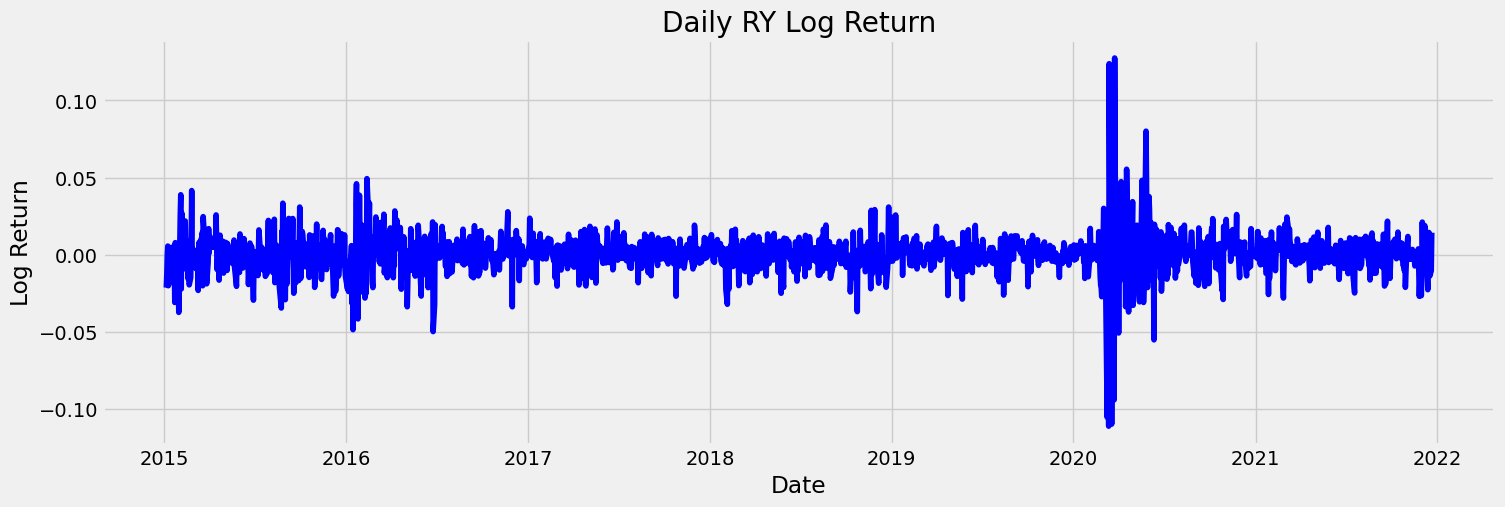

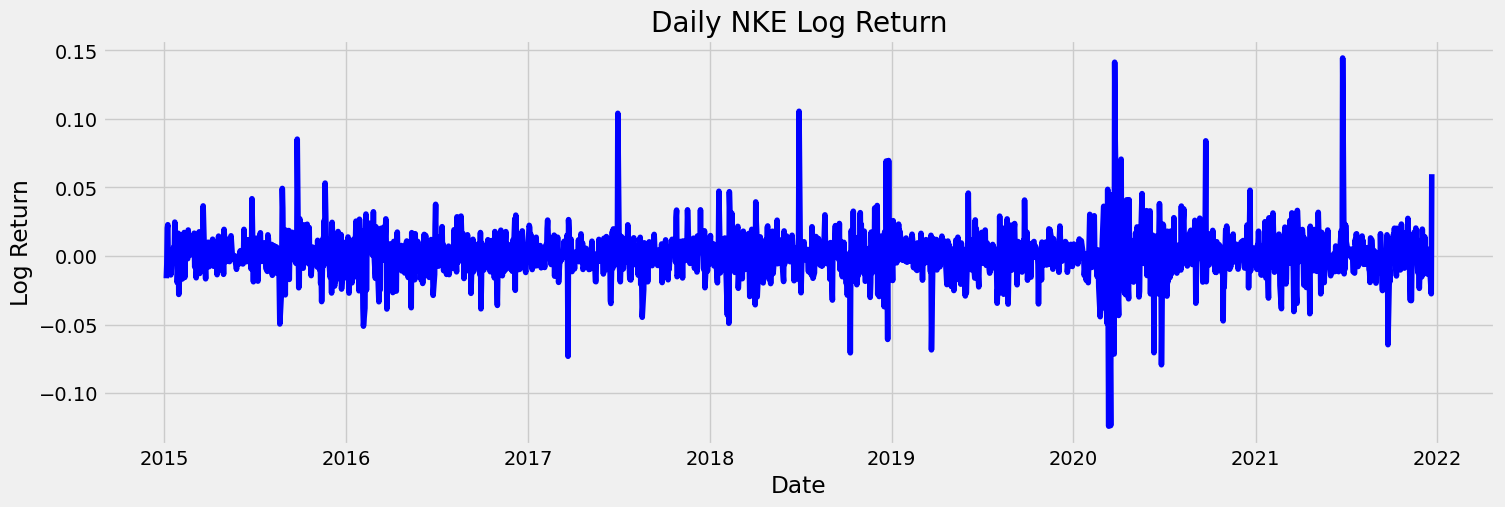

In [58]:
df.reset_index('Date', inplace=True)
for stock in stocks:
  plt.figure(figsize=(16,5), dpi=100)
  plt.plot(df['Date'], df['Log Return'][stock], color='blue')
  title = 'Daily ' + stock + ' Log Return'
  plt.gca().set(title=title, 
                xlabel='Date', ylabel='Log Return')
  plt.show()

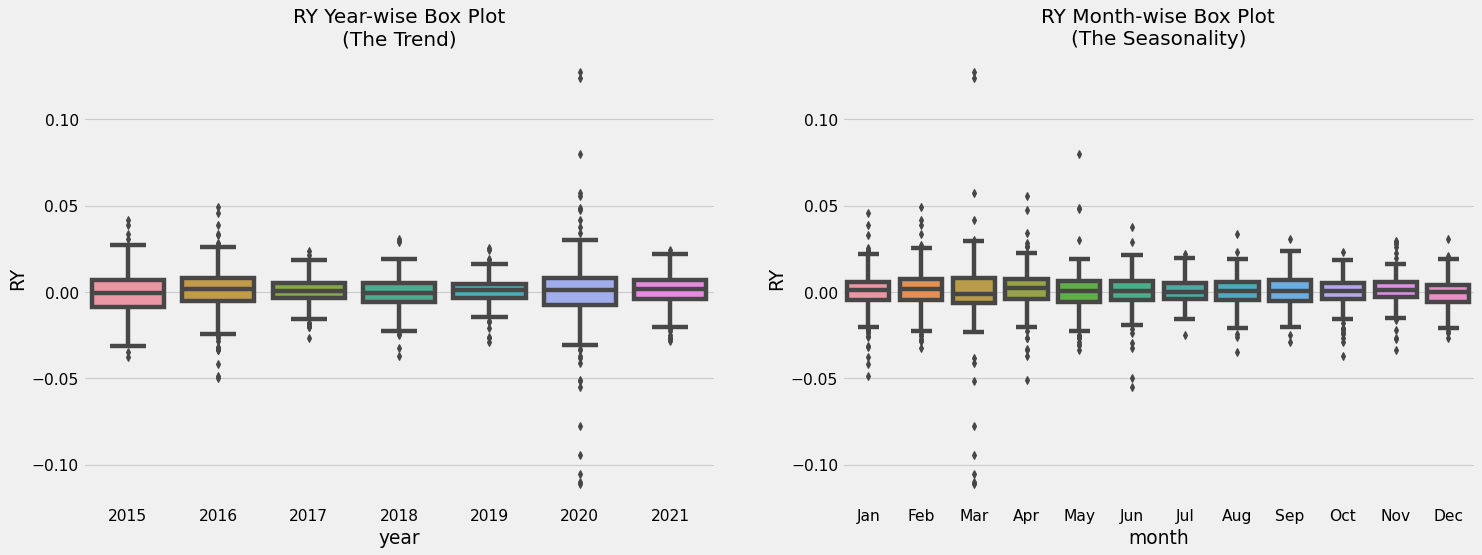

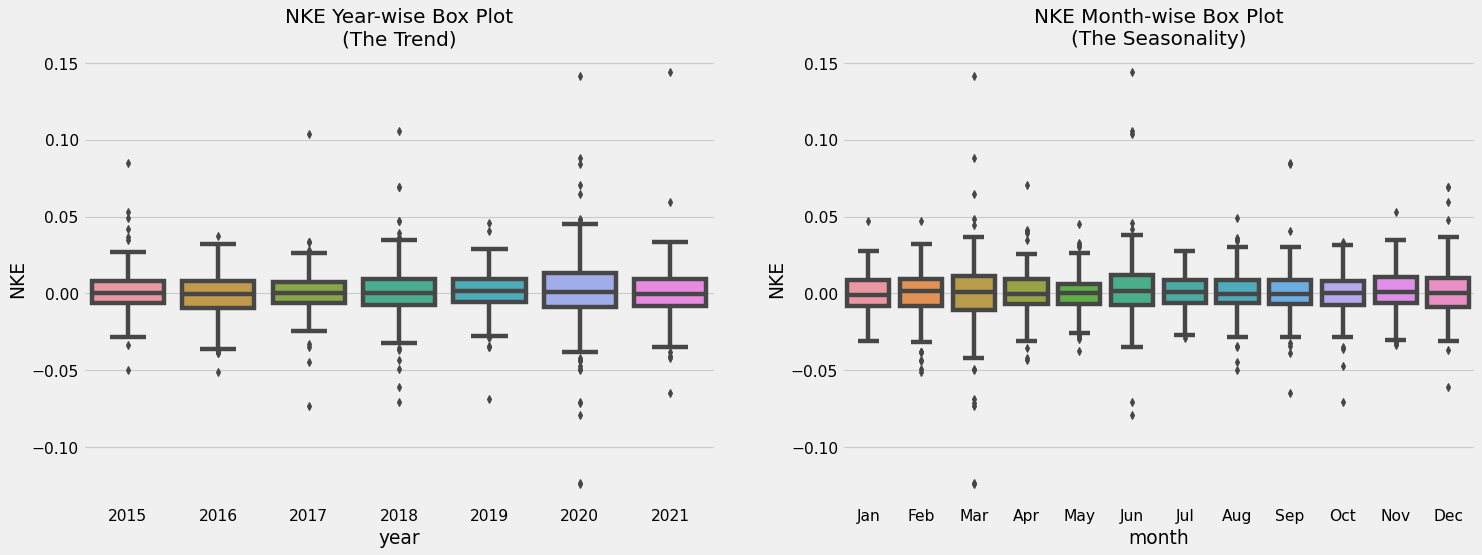

In [59]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

for stock in stocks:
  fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
  sns.boxplot(x=df['year'], y=df['Log Return'][stock], ax=axes[0])
  sns.boxplot(x=df['month'], y=df['Log Return'][stock], data=df['Log Return'].loc[~df.year.isin([2010, 2021]), :])

  axes_0_title = stock + ' Year-wise Box Plot\n(The Trend)'
  axes_1_title = stock + ' Month-wise Box Plot\n(The Seasonality)'
  axes[0].set_title(axes_0_title, fontsize=18); 
  axes[1].set_title(axes_1_title, fontsize=18)
  plt.show()

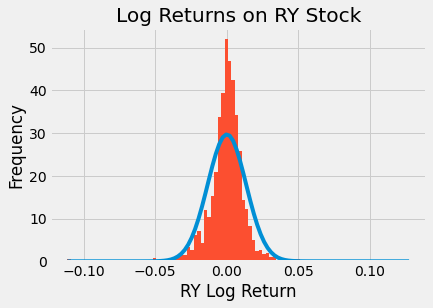

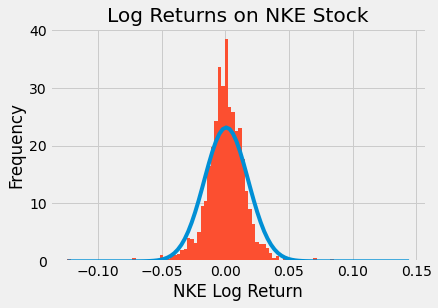

In [60]:
for stock in stocks:
  x_list = np.linspace(df["Log Return"][stock].min(), df["Log Return"][stock].max(), 100)
  y_list = norm.pdf(x_list, loc = df["Log Return"][stock].mean(), scale = df["Log Return"][stock].std())
  plt.plot(x_list, y_list)
  df["Log Return"][stock].hist(bins = 100, density = True)
  title = "Log Returns on " + stock + " Stock"
  x_axis = stock + " Log Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.show()

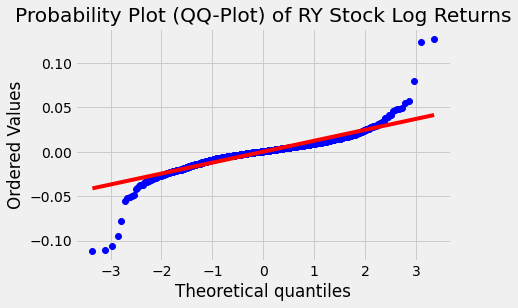

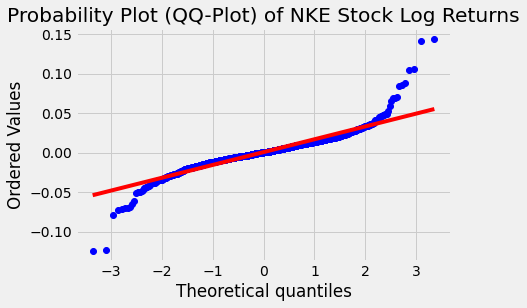

In [61]:
for stock in stocks:
  probplot(df["Log Return"][stock].dropna(), dist = "norm", fit = True, plot = plt)
  title = "Probability Plot (QQ-Plot) of " + stock + " Stock Log Returns"
  plt.title(title)
  plt.show()

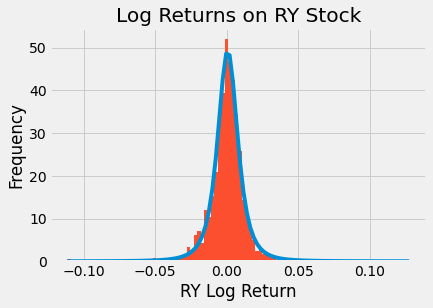

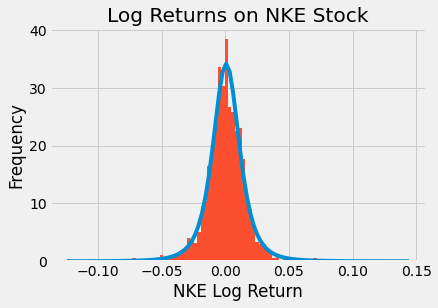

In [62]:
for stock in stocks:
  x_list = np.linspace(df["Log Return"][stock].min(), df["Log Return"][stock].max(), 100)
  params = t.fit(df["Log Return"][stock].dropna())
  dataf, loc, scale = params
  y_list = t.pdf(x_list, dataf, loc, scale)
  plt.plot(x_list, y_list)
  df["Log Return"][stock].hist(bins = 100, density = True)
  title = "Log Returns on " + stock + " Stock"
  x_axis = stock + " Log Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.show()

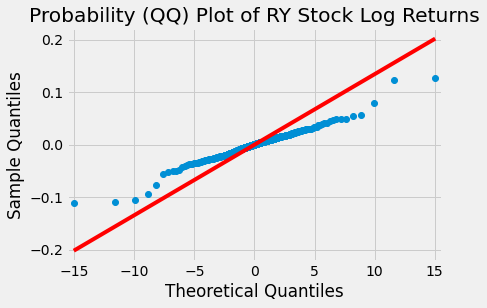

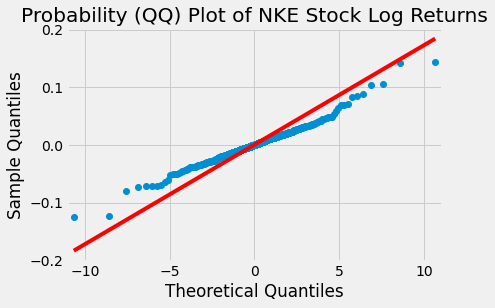

In [63]:
for stock in stocks:
  params = t.fit(df["Log Return"][stock].dropna())
  dataf, loc, scale = params
  sm.qqplot(df["Log Return"][stock].dropna(), dist = t_qqplot(dataf), line = 's')
  title = "Probability (QQ) Plot of " + stock + " Stock Log Returns"
  plt.title(title)
  plt.show()

In [64]:
# Sample Skewness and Kurtosis for Each Stock Log Returns
for stock in stocks:
  print("Sample Skewness of " + stock + " Log Returns is: ", df["Log Return"][stock].skew())
  print("Kurtosis of " + stock + " Log Returns is: ", df["Log Return"][stock].kurtosis())
  print("                                                                  ")

Sample Skewness of RY Log Returns is:  -0.24463589701289126
Kurtosis of RY Log Returns is:  19.227622162566348
                                                                  
Sample Skewness of NKE Log Returns is:  0.4431778604699946
Kurtosis of NKE Log Returns is:  11.760541044892392
                                                                  


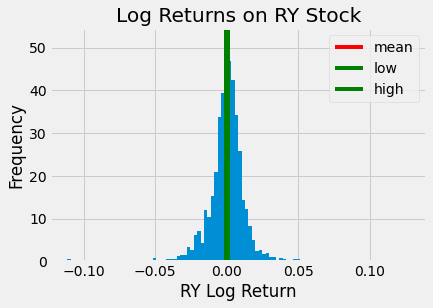

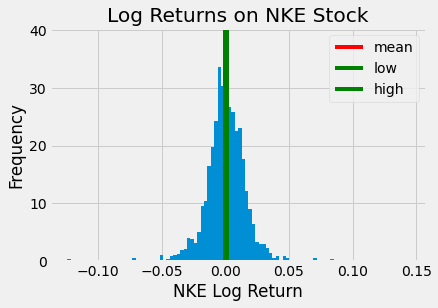

In [65]:
# Confidence Intervals of Stock Log Returns
for stock in stocks:
  values = df["Log Return"][stock].dropna().to_numpy()
  mean = values.mean()
  std = values.std(ddof = 1)

  low = mean - 1.96 * std / np.sqrt(len(values))
  high = mean + 1.96 * std / np.sqrt(len(values))

  df["Log Return"][stock].hist(bins = 100, density = True)
  title = "Log Returns on " + stock + " Stock"
  x_axis = stock + " Log Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.axvline(mean, label = 'mean', color = 'red')
  plt.axvline(low, label = 'low', color = 'green')
  plt.axvline(high, label = 'high', color = 'green')
  plt.legend()
  plt.show()

In [66]:
# # Confidence Intervals of Stock Log Returns
# for stock in stocks:
#   values = df["Log Return"][stock].dropna().to_numpy()
#   mean = values.mean()
#   std = values.std(ddof = 1)

#   low = mean - 1.96 * std / np.sqrt(len(values))
#   high = mean + 1.96 * std / np.sqrt(len(values))

#   title = "Log Returns on " + stock + " Stock"
#   x_axis = stock + " Log Return"
#   y_axis = "Frequency"
#   plt.xlabel(x_axis)
#   plt.ylabel(y_axis)
#   plt.title(title)
#   plt.axvline(mean, label = 'mean', color = 'red')
#   plt.axvline(low, label = 'low', color = 'green')
#   plt.axvline(high, label = 'high', color = 'green')
#   plt.legend()
#   plt.show()

In [67]:
# Statistical Hypothesis Testing on Stock Log Returns

for stock in stocks:
  values = df["Log Return"][stock].dropna().to_numpy()
  print("Testing for Normality of " + stock + " Stock Log Returns: ", jarque_bera(values))
  print("Testing for Normality of " + stock + " Stock Log Returns: ", normaltest(values))
  print("                                                                  ")

Testing for Normality of RY Stock Log Returns:  (26888.613587919943, 0.0)
Testing for Normality of RY Stock Log Returns:  NormaltestResult(statistic=453.31191488410104, pvalue=3.6691747182227246e-99)
                                                                  
Testing for Normality of NKE Stock Log Returns:  (10107.93259013833, 0.0)
Testing for Normality of NKE Stock Log Returns:  NormaltestResult(statistic=398.9526081033754, pvalue=2.336371392382939e-87)
                                                                  


In [68]:
# for stock in stocks:
#   values = df["Log Return"][stock].dropna().to_numpy()
#   dataf, loc, scale = t.fit(values)
#   print("Testing for Normality of " + stock + " Stock Log Returns: ", kstest(values, 
#                                                                          t.cdf(x, dataf, loc, scale)))
#   print("                                                                  ")

In [69]:
for stock in stocks:
  values = df["Log Return"][stock].dropna().to_numpy()
  print("One Sample t-test of " + stock + " Stock Log Returns: ", ttest_1samp(values, 0))
  print("                                                                  ")

One Sample t-test of RY Stock Log Returns:  Ttest_1sampResult(statistic=0.7042293870520937, pvalue=0.481383417309842)
                                                                  
One Sample t-test of NKE Stock Log Returns:  Ttest_1sampResult(statistic=1.7379662148172164, pvalue=0.08239226716838373)
                                                                  


In [70]:
stocks_log_returns = df["Log Return"]
for stock in stocks:
  new_col_name = stock + " Log Returns"
  stocks_log_returns.rename({stock: new_col_name}, axis=1, inplace=True)
stocks_log_returns.head()

Symbols  NKE Log Returns  RY Log Returns
0                    NaN             NaN
1              -0.016231       -0.021379
2              -0.005900       -0.012749
3               0.020446       -0.000151
4               0.022822        0.005570

In [71]:
print("The Log Return Means of ALL stocks is: ")
print("                                   ")
stocks_log_returns.mean()

The Log Return Means of ALL stocks is: 
                                   


Symbols
NKE Log Returns    0.000715
RY Log Returns     0.000226
dtype: float64

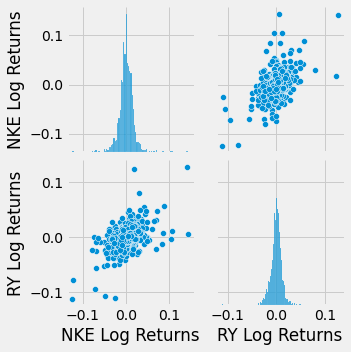

In [72]:
sns.pairplot(stocks_log_returns)

Text(0.5, 1.0, 'Relationship Between Volatility and Log Return for All Stocks')

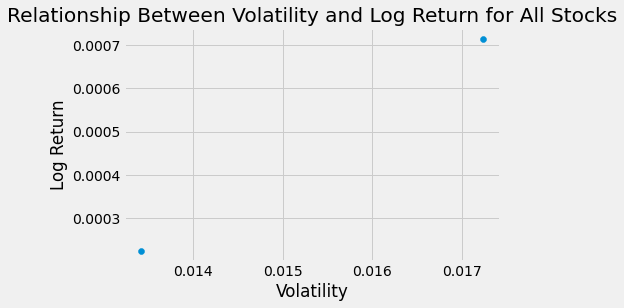

In [73]:
plt.scatter(stocks_log_returns.std(), stocks_log_returns.mean())
plt.xlabel("Volatility")
plt.ylabel("Log Return")
plt.title("Relationship Between Volatility and Log Return for All Stocks")

In [74]:
# Correlation matrix between All Stock Log Returns
stocks_log_returns.corr()

Symbols          NKE Log Returns  RY Log Returns
Symbols                                         
NKE Log Returns           1.0000          0.4697
RY Log Returns            0.4697          1.0000

In [75]:
# Covariance matrix between All Stock Log Returns
stocks_log_returns.cov()

Symbols          NKE Log Returns  RY Log Returns
Symbols                                         
NKE Log Returns         0.000297        0.000109
RY Log Returns          0.000109        0.000180

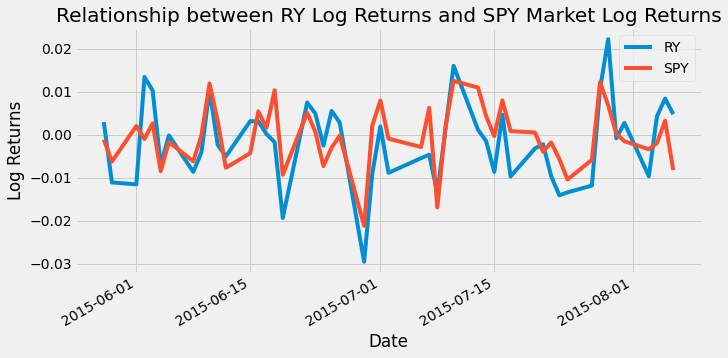

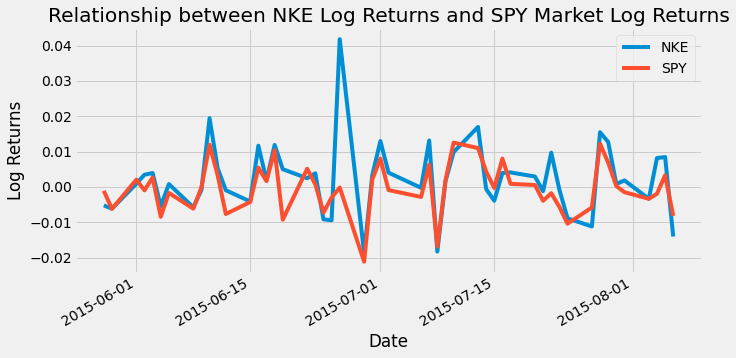

In [76]:
df.set_index('Date', inplace=True)

for stock in stocks:
  joined = pd.concat([pd.DataFrame(df["Log Return"][stock]), pd.DataFrame(spy_market["Log Return"]["SPY"])], axis=1)
  joined.iloc[100:150].plot(figsize = (10,5))
  title = "Relationship between " + stock + " Log Returns and SPY Market Log Returns"
  x_axis = "Date"
  y_axis = "Log Returns"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)

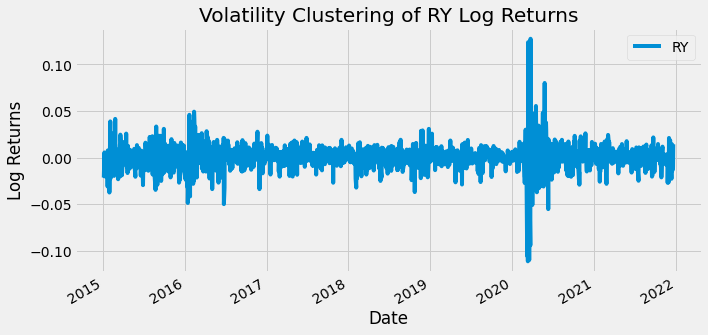

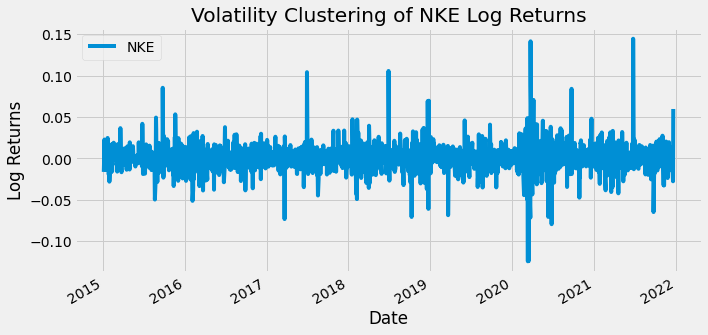

In [77]:
for stock in stocks:
  log_returns = pd.DataFrame(df["Log Return"][stock])
  log_returns.plot(figsize = (10,5))
  title = "Volatility Clustering of " + stock + " Log Returns"
  x_axis = "Date"
  y_axis = "Log Returns"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)

RY Alpha is:  [[0.60646474]]
RY Beta is:  [0.00032622]
                                    
                                    
Standard Deviation between RY and SPY Market is: 
RY     0.013427
SPY    0.011255
dtype: float64
                                    
                                    


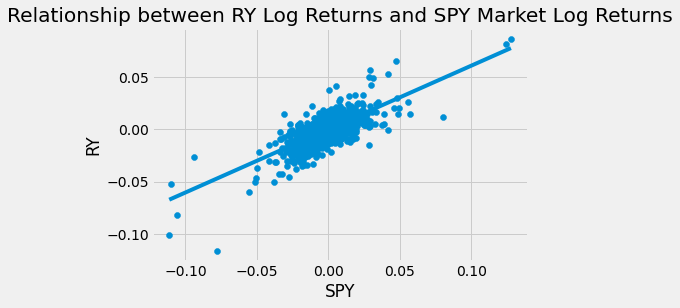

NKE Alpha is:  [[0.41617449]]
NKE Beta is:  [0.00016556]
                                    
                                    
Standard Deviation between NKE and SPY Market is: 
NKE    0.017233
SPY    0.011255
dtype: float64
                                    
                                    


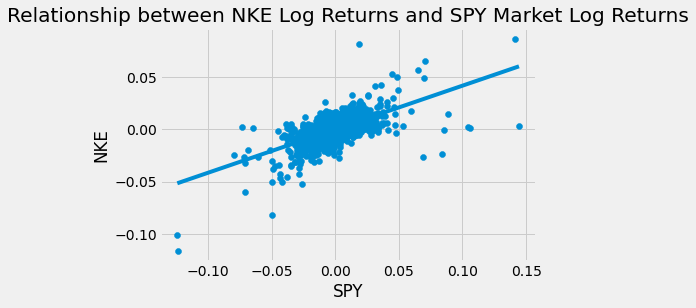

In [78]:
for stock in stocks:
    joined = pd.concat([pd.DataFrame(df["Log Return"][stock]), pd.DataFrame(spy_market["Log Return"]["SPY"])], axis=1)
    joined.dropna(inplace=True)
    X = joined[[stock]].to_numpy()
    Y = joined[["SPY"]].to_numpy()
    model = LinearRegression()
    model.fit(X, Y)
    X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1,1)
    Y_predict = model.predict(X_predict)
    plt.scatter(X, Y)
    plt.plot(X_predict, Y_predict)
    title = "Relationship between " + stock + " Log Returns and SPY Market Log Returns"
    x_axis = "SPY"
    y_axis = stock
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    print(stock + " Alpha is: ", model.coef_)
    print(stock + " Beta is: ", model.intercept_)
    print("                                    ")
    print("                                    ")
    print("Standard Deviation between " + stock + " and SPY Market is: ")
    print(joined.std())
    print("                                    ")
    print("                                    ")
    plt.show()

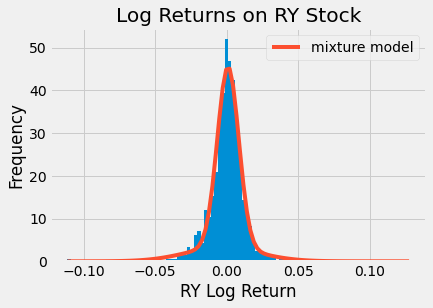

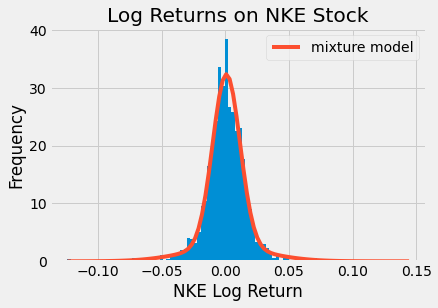

In [79]:
for stock in stocks:
  dataf = df["Log Return"][stock].dropna().to_numpy().reshape(-1,1)
  model = GaussianMixture(n_components=2)
  model.fit(dataf)
  weights = model.weights_
  means = model.means_
  means = means.flatten()
  cov = model.covariances_
  var = cov.flatten()
  
  x_list = np.linspace(dataf.min(), dataf.max(), 100)
  fx0 = norm.pdf(x_list, means[0], np.sqrt(var[0]))
  fx1 = norm.pdf(x_list, means[1], np.sqrt(var[1]))
  fx = weights[0] * fx0 + weights[1] * fx1

  df["Log Return"][stock].hist(bins = 100, density = True)
  title = "Log Returns on " + stock + " Stock"
  x_axis = stock + " Log Return"
  y_axis = "Frequency"
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(title)
  plt.plot(x_list, fx, label = 'mixture model')
  plt.legend()
  plt.show()

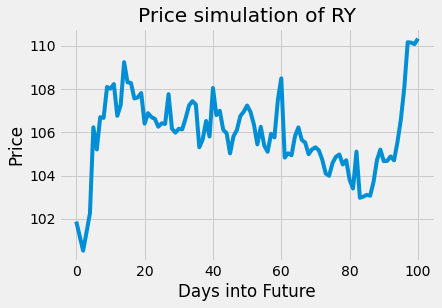

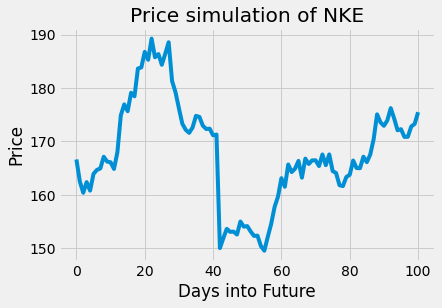

In [80]:
# Price Simulation of Stock Log Returns
for stock in stocks:
  p0 = df.iloc[-1]["Close"][stock]
  prices = [p0]
  log_returns = df["Log Return"][stock].dropna()
  for _ in range(100):
    r = np.random.choice(log_returns)
    p = prices[-1] * (1 + r)
    prices.append(p)
  plt.plot(prices)
  title = "Price simulation of " + stock
  plt.xlabel("Days into Future")
  plt.ylabel("Price")
  plt.title(title)
  plt.show()

## Time Series Analysis

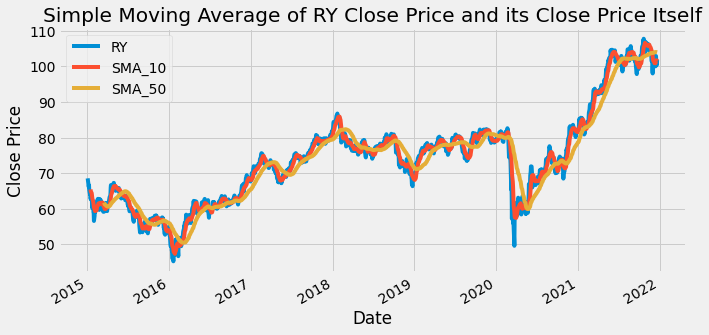

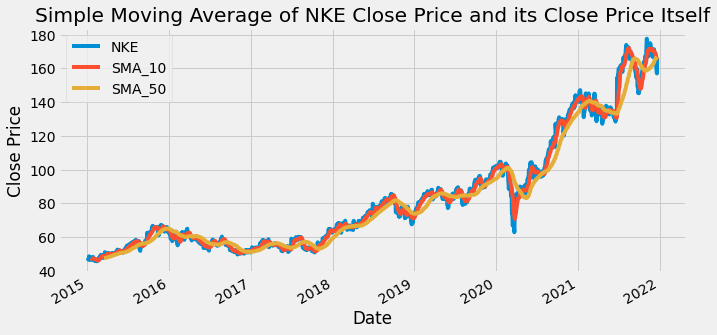

In [81]:
# Simple Moving Average with Time Window of 10 and 50 days
for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  # df_stock_close.set_index('Date', inplace=True)
  df_stock_close = pd.DataFrame(df_stock_close["Close"][stock])
  df_stock_close['SMA_10'] = ""
  df_stock_close['SMA_10'] = df_stock_close[stock].rolling(10).mean()
  df_stock_close['SMA_50'] = ""
  df_stock_close['SMA_50'] = df_stock_close[stock].rolling(50).mean()
  df_stock_close.plot(figsize = (10,5))
  title = "Simple Moving Average of " + stock + " Close Price and its Close Price Itself"
  plt.ylabel("Close Price")
  plt.title(title)
  plt.show()

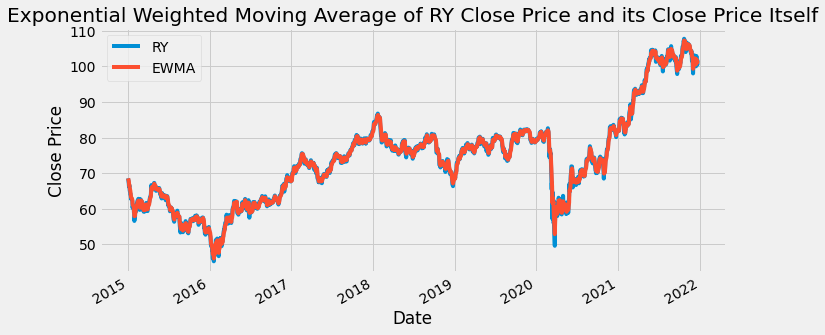

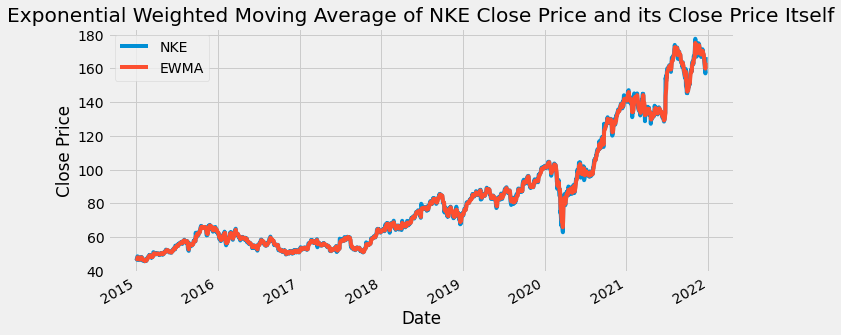

In [82]:
# Exponential Weighted Moving Average with chosen alpha
alpha = 0.5
for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  # df_stock_close.set_index('Date', inplace=True)
  df_stock_close = pd.DataFrame(df_stock_close["Close"][stock])
  df_stock_close['EWMA'] = ""
  df_stock_close['EWMA'] = df_stock_close[stock].ewm(alpha = alpha, adjust = False).mean()
  df_stock_close.plot(figsize = (10,5))
  title = "Exponential Weighted Moving Average of " + stock + " Close Price and its Close Price Itself"
  plt.ylabel("Close Price")
  plt.title(title)
  plt.show()

{'smoothing_level': 0.9220401438657685, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 68.43180049256617, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                   
                   


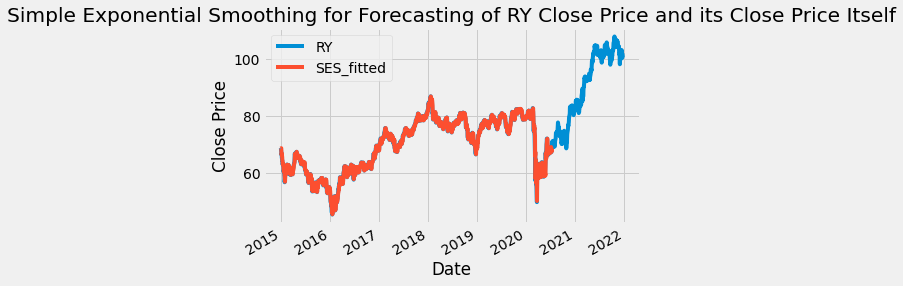

{'smoothing_level': 0.943173837339294, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 47.47083615438257, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
                   
                   


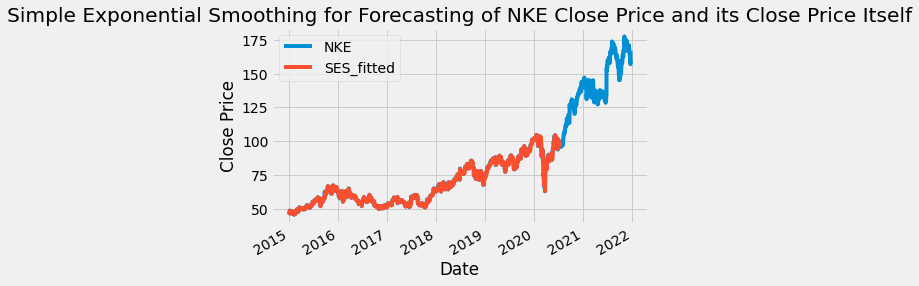

In [83]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Simple Exponential Smoothing for Forecasting
alpha = 0.2
for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  # df_stock_close.set_index('Date', inplace=True)
  df_stock_close = pd.DataFrame(df_stock_close["Close"][stock])
  # df_stock_close['EWMA'] = ""
  # df_stock_close['EWMA'] = df_stock_close[stock].ewm(alpha = alpha, adjust = False).mean()
  # df_stock_close.index.freq = 'MS'
  # ses = SimpleExpSmoothing(df_stock_close[stock])
  # res = ses.fit(smoothing_level=alpha, optimized=False)
  # df_stock_close["SES"] = res.predict(start = df_stock_close.index[0], end = df_stock_close.index[-1])
  # np.allclose(df_stock_close["SES"], res.fittedvalues)
  # df_stock_close.plot(figsize = (10,5))
  length_test = 365
  train = df_stock_close.iloc[:-length_test]
  test = df_stock_close.iloc[-length_test:]
  ses = SimpleExpSmoothing(train[stock])
  res = ses.fit()
  df_stock_close.loc[:-length_test, 'SES_fitted'] = res.fittedvalues
  df_stock_close.loc[-length_test:, 'SES_fitted'] = res.forecast(length_test)
  df_stock_close[[stock, 'SES_fitted']].plot()
  title = "Simple Exponential Smoothing for Forecasting of " + stock + " Close Price and its Close Price Itself"
  plt.ylabel("Close Price")
  plt.title(title)
  print(res.params)
  print("                   ")
  print("                   ")
  plt.show()

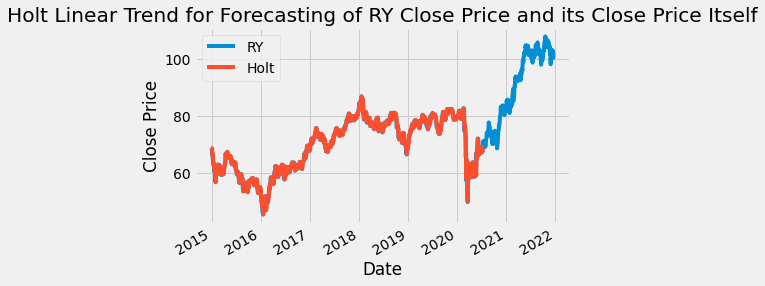

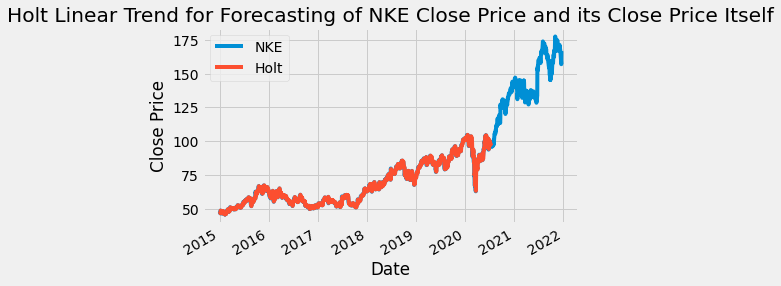

In [84]:
# Holt Linear Trend Model for Stock Price
from statsmodels.tsa.holtwinters import Holt

for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  # df_stock_close.set_index('Date', inplace=True)
  df_stock_close = pd.DataFrame(df_stock_close["Close"][stock])
  # holt = Holt(df_stock_close[stock])
  # res_holt = holt.fit()
  # df_stock_close["Holt"] = res_holt.fittedvalues
  # df_stock_close[[stock, 'Holt']].plot()
  length_test = 365
  train = df_stock_close.iloc[:-length_test]
  test = df_stock_close.iloc[-length_test:]
  holt = Holt(train[stock])
  res_holt = holt.fit()
  df_stock_close.loc[:-length_test, 'Holt'] = res_holt.fittedvalues
  df_stock_close.loc[-length_test:, 'Holt'] = res_holt.forecast(length_test)
  df_stock_close[[stock, 'Holt']].plot()
  title = "Holt Linear Trend for Forecasting of " + stock + " Close Price and its Close Price Itself"
  plt.ylabel("Close Price")
  plt.title(title)
  # print(res.params)
  # print("                   ")
  # print("                   ")
  plt.title(title)
  plt.show()

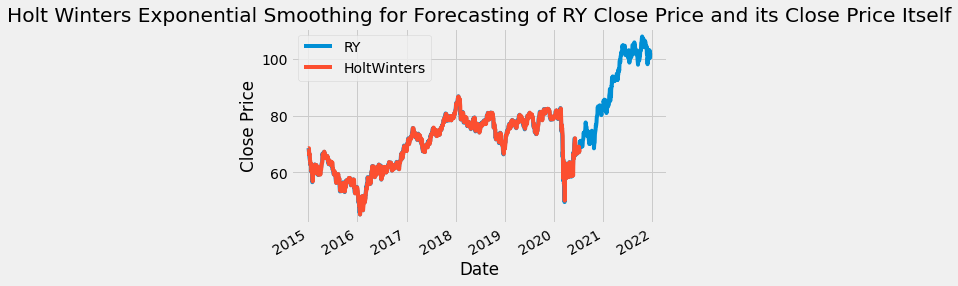

                   
Train Root Mean Squared Error (RMSE) of RY is:  0.789377324178228
Test Root Mean Squared Error (RMSE) of RY is:  679.4140775803085
                   
Train Mean Absolute Error (MAE) of RY is:  0.5843494367394431
Test Mean Absolute Error (MAE) of RY is:  22.608829431413035
                   


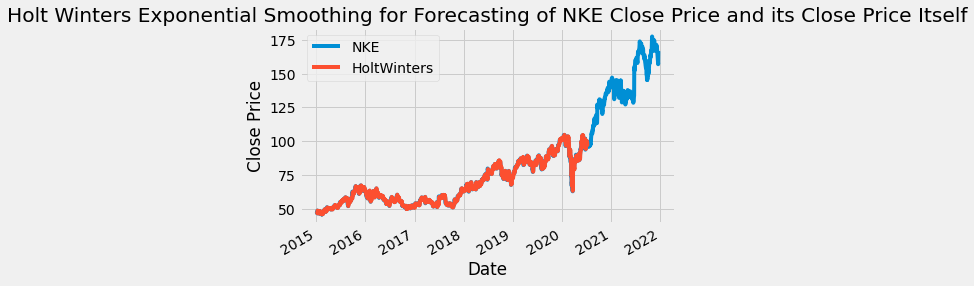

                   
Train Root Mean Squared Error (RMSE) of NKE is:  1.548895438886744
Test Root Mean Squared Error (RMSE) of NKE is:  1648.894686410644
                   
Train Mean Absolute Error (MAE) of NKE is:  0.8074308041675831
Test Mean Absolute Error (MAE) of NKE is:  37.14900926707974
                   


In [85]:
# Holt Winters Exponential Smoothing Model for Stock Prices
from statsmodels.tsa.holtwinters import ExponentialSmoothing

for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  # df_stock_close.set_index('Date', inplace=True)
  df_stock_close = pd.DataFrame(df_stock_close["Close"][stock])
  # holt_winters = ExponentialSmoothing(df_stock_close[stock], trend = 'add', 
  #                                     seasonal = 'add', seasonal_periods = 12)
  # res_hw = holt.fit()
  # df_stock_close["Holt"] = res_hw.fittedvalues
  # df_stock_close[[stock, 'Holt']].plot()
  length_test = 365
  train = df_stock_close.iloc[:-length_test]
  test = df_stock_close.iloc[-length_test:]
  holt_winters = ExponentialSmoothing(train[stock], trend = 'mul', 
                                      seasonal = 'mul', seasonal_periods = 12) # mul or add for seasonal/trend
  res_hw = holt_winters.fit()
  df_stock_close.loc[:-length_test, 'HoltWinters'] = res_hw.fittedvalues
  df_stock_close.loc[-length_test:, 'HoltWinters'] = res_hw.forecast(length_test)
  df_stock_close[[stock, 'HoltWinters']].plot()
  title = "Holt Winters Exponential Smoothing for Forecasting of " + stock + " Close Price and its Close Price Itself"
  plt.ylabel("Close Price")
  plt.title(title)
  plt.show()
  print("                   ")
  print("Train Root Mean Squared Error (RMSE) of " + stock + " is: ", mean_squared_error(train[stock], res_hw.fittedvalues))
  print("Test Root Mean Squared Error (RMSE) of " + stock + " is: ", mean_squared_error(test[stock], res_hw.forecast(length_test)))
  print("                   ")
  print("Train Mean Absolute Error (MAE) of " + stock + " is: ", mean_absolute_error(train[stock], res_hw.fittedvalues))
  print("Test Mean Absolute Error (MAE) of " + stock + " is: ", mean_absolute_error(test[stock], res_hw.forecast(length_test)))
  print("                   ")

Test Statistics:  -1.286387625207779
P-value:  0.6353767541347404
Non-Stationary
None
Test Statistics:  -12.530810052002854
P-value:  2.431001230527439e-23
Stationary
None


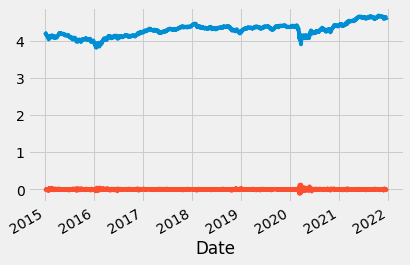

Test Statistics:  -0.13899022621860255
P-value:  0.9454137975491348
Non-Stationary
None
Test Statistics:  -15.794916438545615
P-value:  1.0911167055438686e-28
Stationary
None


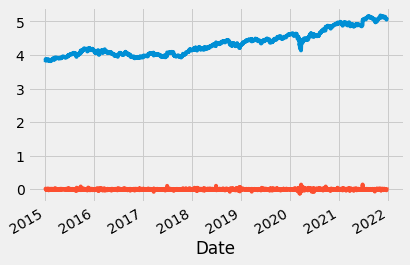

In [86]:
# Stationary on Stock Prices
from statsmodels.tsa.stattools import adfuller

def adf(x):
  res = adfuller(x)
  print("Test Statistics: ", res[0])
  print("P-value: ", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

for stock in stocks:
  df_stock_close = df[["Date", "Close"]]
  df_stock_return = df[["Date", "Return"]]
  # df_stock_close.set_index('Date', inplace=True)
  # df_stock_return.set_index('Date', inplace=True)
  df_stock_close = df_stock_close["Close"]
  df_stock_return = df_stock_return["Return"]
  new_column_name_close = stock + " Close"
  df_stock_close = df_stock_close.rename(columns = {stock: new_column_name_close})
  new_column_name_return = stock + " Return"
  df_stock_return = df_stock_return.rename(columns = {stock: new_column_name_return})
  df_stock = pd.concat([pd.DataFrame(df_stock_close[new_column_name_close]), 
                              pd.DataFrame(df_stock_return[new_column_name_return])], axis=1)
  new_column_name_log_close = stock + " Log Close"
  df_stock[new_column_name_log_close] = np.log(df_stock[new_column_name_close])
  new_column_name_log_return = stock + " Log Return"
  df_stock[new_column_name_log_return] = df_stock[new_column_name_log_close].diff()
  df_stock[new_column_name_log_close].plot()
  df_stock[new_column_name_log_return].plot()
  print(adf(df_stock[new_column_name_log_close]))
  print(adf(df_stock[new_column_name_log_return].dropna()))
  plt.show()

In [87]:
# df_stock_close = df[["Date", "Close"]]
# df_stock_return = df[["Date", "Return"]]
# df_stock_close.set_index('Date', inplace=True)
# df_stock_return.set_index('Date', inplace=True)
# df_stock_close = df_stock_close["Close"]
# df_stock_return = df_stock_return["Return"]
# new_column_name_close = "AMZN" + " Close"
# df_stock_close = df_stock_close.rename(columns = {"AMZN": new_column_name_close})
# new_column_name_return = "AMZN" + " Return"
# df_stock_return = df_stock_return.rename(columns = {"AMZN": new_column_name_return})
# df_stock = pd.concat([pd.DataFrame(df_stock_close[new_column_name_close]), 
#                             pd.DataFrame(df_stock_return[new_column_name_return])], axis=1)
# new_column_name_log_close = "AMZN" + " Log Close"
# df_stock[new_column_name_log_close] = np.log(df_stock[new_column_name_close])
# new_column_name_log_return = "AMZN" + " Log Return"
# df_stock[new_column_name_log_return] = df_stock[new_column_name_log_close].diff()
# df_stock.head()

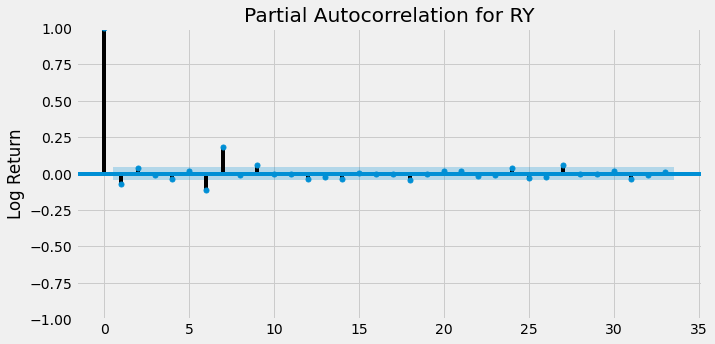

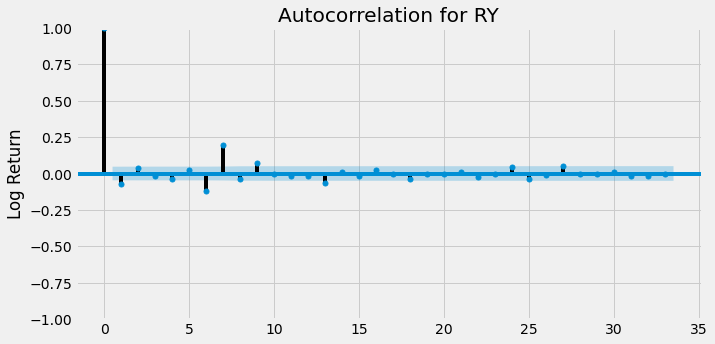

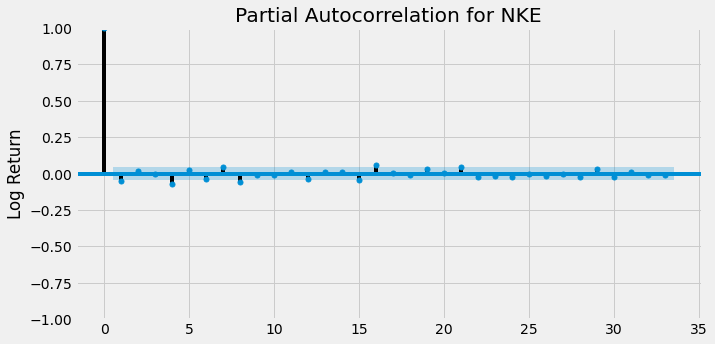

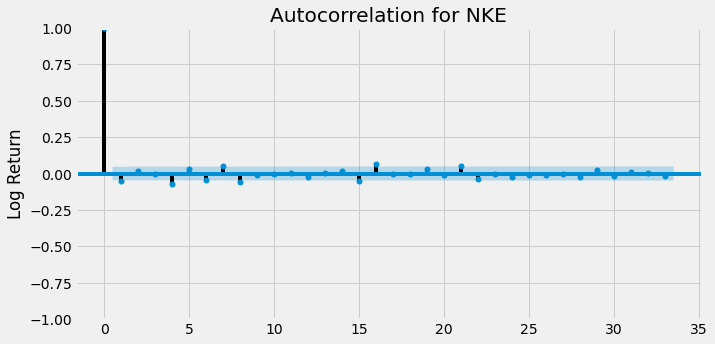

In [88]:
# ACF/PACF for Stock Prices

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

for stock in stocks:
  fig, ax = plt.subplots(figsize=(10,5))
  plot_pacf(df["Log Return"][stock].dropna(), ax=ax)
  title = "Partial Autocorrelation for " + stock 
  plt.title(title)
  plt.ylabel("Log Return")
  plt.show()
  fig, ax = plt.subplots(figsize=(10,5))
  plot_acf(df["Log Return"][stock].dropna(), ax=ax)
  title = "Autocorrelation for " + stock 
  plt.title(title)
  plt.ylabel("Log Return")
  plt.show()

ARIMA Model for  RY
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3641.757, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3645.384, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3637.650, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3638.312, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3643.384, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3638.193, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3638.735, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3640.234, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3635.650, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3636.193, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3636.735, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3636.312, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3638.259, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.192 seconds
  

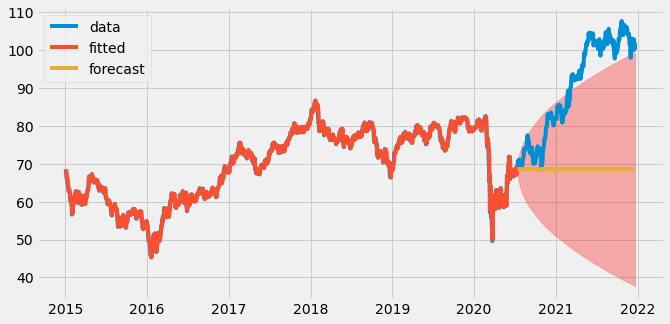

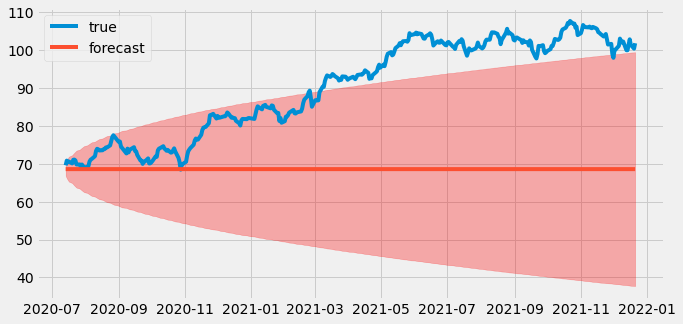

                    
                    
ARIMA Model for  NKE
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4579.610, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4584.990, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4581.815, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4582.094, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4584.080, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4572.265, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4582.533, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4583.361, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4565.189, Time=0.70 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4584.409, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4560.726, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4564.711, Time=0.85 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4556.271, Time=1.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   

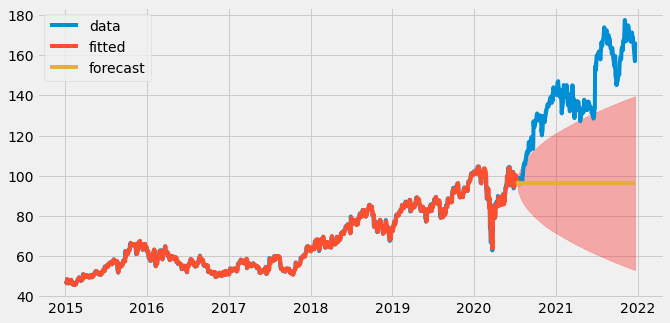

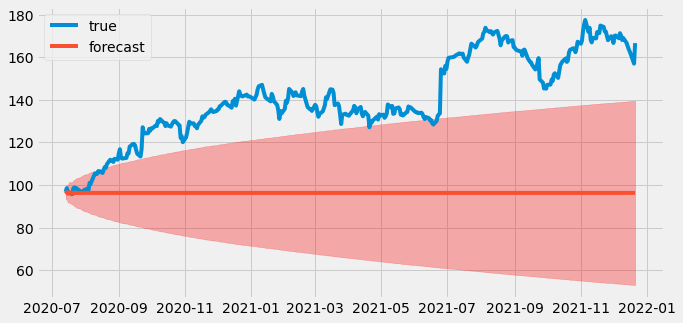

In [89]:
# Arima (Auto Regressive Integrated Moving Average) on Stock Prices
import pmdarima as pm

# df.set_index('Date', inplace=True)
length_test = 365

def result_plot(model, full_data, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start = d, end = -1)
  test_pred, confint = model.predict(n_periods = length_test, return_conf_int = True)

  fig, ax = plt.subplots(figsize = (10,5))
  ax.plot(full_data.index, full_data, label = 'data')
  ax.plot(train.index[d:], train_pred, label = 'fitted')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.3)
  ax.legend()
  plt.show()


def test_plot(model, test):
  test_pred, confint = model.predict(n_periods = length_test, return_conf_int = True)

  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(test.index, test, label = 'true')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1], color = 'red', alpha = 0.3)
  ax.legend()
  plt.show()

for stock in stocks:
  train = df["Close"][stock].iloc[:-length_test]
  test = df["Close"][stock].iloc[-length_test:]
  print("ARIMA Model for ", stock)
  arima_model = pm.auto_arima(train, error_action = 'ignore', trace = True,
                              surpress_warnings = True, maxiter = 10, seasonal = False)
  print("                    ")
  print("Model summary for " + stock + ": ", arima_model.summary())
  print("Model parameters for " + stock + ": ", arima_model.get_params())
  print("                    ")
  print("Root Mean Squared Error (RMSE) ARIMA for " + stock + ": ", mean_squared_error(arima_model.predict(length_test), test))
  # print("Root Mean Squared Error (RMSE) Naive for " + stock + ": ", mean_squared_error(train.iloc[-1], test))
  print("                    ")
  result_plot(arima_model, df["Close"][stock], train, test)
  test_plot(arima_model, test)
  print("                    ")
  print("                    ")

Portfolio Tracking 

In [90]:
# df.set_index('Date', inplace=True)
all_dates = df.index.unique()
start_date = all_dates.get_loc("2021-05-03")
end_date = all_dates.get_loc("2021-11-01")
dates = all_dates[start_date:end_date+1]

In [91]:
stock_close_prices = df["Close"]
stock_close_returns = df["Return"][1:]
stock_close_returns.head()

Symbols          NKE        RY
Date                          
2015-01-05 -0.016100 -0.021153
2015-01-06 -0.005882 -0.012668
2015-01-07  0.020656 -0.000151
2015-01-08  0.023084  0.005586
2015-01-09 -0.011024 -0.019967

In [92]:
mean_return = stock_close_returns.mean()
mean_return

Symbols
NKE    0.000864
RY     0.000316
dtype: float64

In [93]:
cov = stock_close_returns.cov()
cov

Symbols       NKE        RY
Symbols                    
NKE      0.000300  0.000108
RY       0.000108  0.000180

In [94]:
amount_invested_in_portfolio = 0

# Enter Amount of Investment for Each Stock Portfolio Investment 
invest_in_stock = {}
for stock in stocks:
  amount_invested_in_stock = input("Enter Amount of Money Invested in " + stock + ": ")
  amount_invested_in_portfolio += float(amount_invested_in_stock)
  invest_in_stock[stock] = float(amount_invested_in_stock)
print("Total Portfolio Investment: ", amount_invested_in_portfolio)

Enter Amount of Money Invested in RY: 15000
Enter Amount of Money Invested in NKE: 5000
Total Portfolio Investment:  20000.0


In [95]:
# Weights of Each Stock Invested In
weights_stocks = {}
for stock in stocks:
  weights_stocks[stock] = invest_in_stock[stock] / amount_invested_in_portfolio
print(weights_stocks)

{'RY': 0.75, 'NKE': 0.25}


In [96]:
# Portfolio Return With Given Weights and Daily Returns of Stocks
stock_close_returns_copy = stock_close_returns.copy()
for stock in stocks:
  stock_close_returns_copy[stock] = stock_close_returns_copy[stock] * weights_stocks[stock]
stock_close_returns_copy['Portfolio Return'] = stock_close_returns_copy[stocks].sum(axis = 1)
stock_close_returns_copy['Cumulative Portfolio Return'] = (1 + stock_close_returns_copy['Portfolio Return']).cumprod() - 1
stock_close_returns_copy.head()

Symbols          NKE        RY  Portfolio Return  Cumulative Portfolio Return
Date                                                                         
2015-01-05 -0.004025 -0.015864         -0.019889                    -0.019889
2015-01-06 -0.001471 -0.009501         -0.010971                    -0.030643
2015-01-07  0.005164 -0.000113          0.005051                    -0.025746
2015-01-08  0.005771  0.004189          0.009960                    -0.016043
2015-01-09 -0.002756 -0.014975         -0.017731                    -0.033489

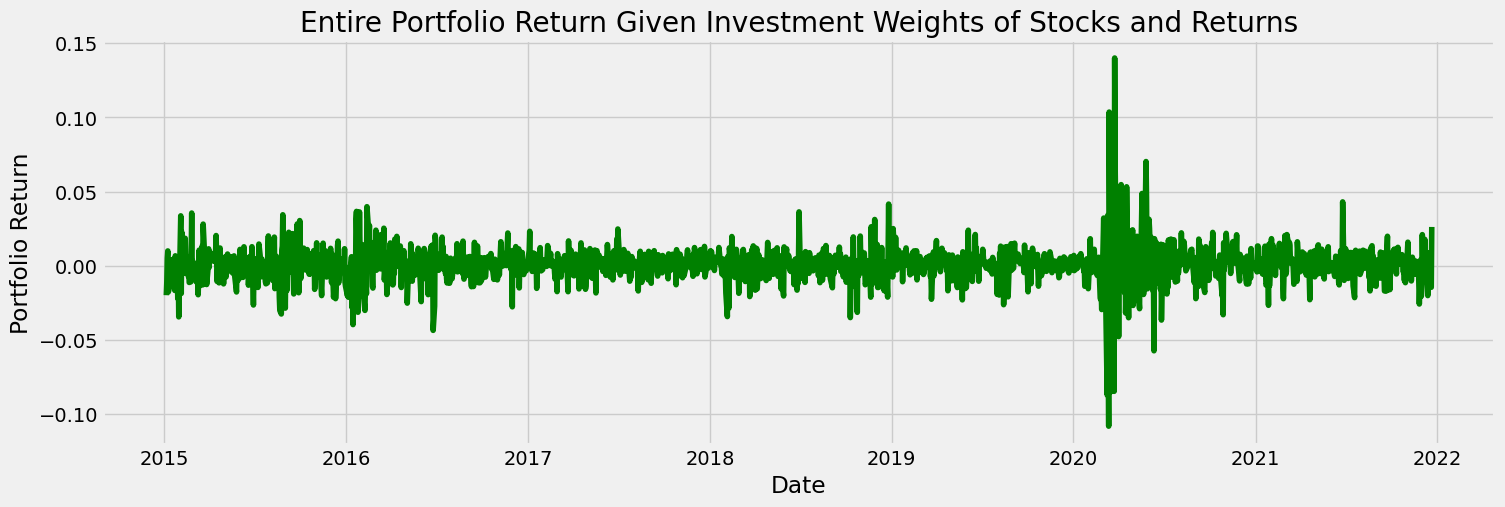

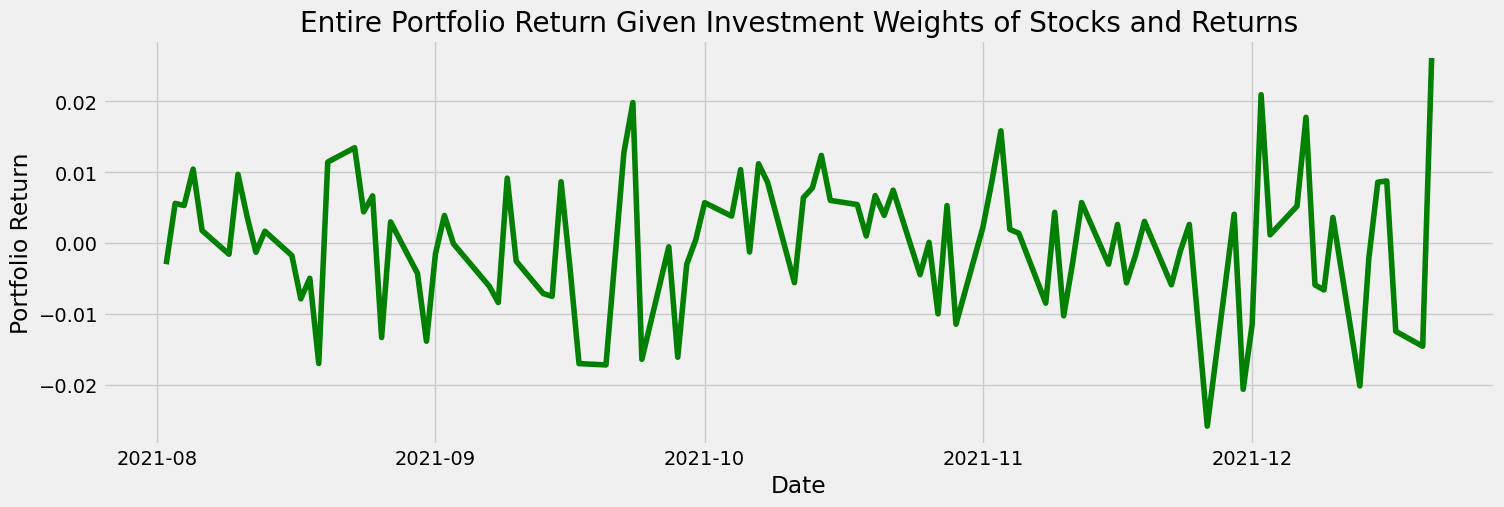

In [97]:
stock_close_returns_copy.reset_index('Date', inplace=True)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(stock_close_returns_copy['Date'], stock_close_returns_copy['Portfolio Return'], color='green')
title = 'Entire Portfolio Return Given Investment Weights of Stocks and Returns'
plt.gca().set(title=title, 
              xlabel='Date', ylabel='Portfolio Return')
plt.show()


stock_close_returns_copy.set_index('Date', inplace=True)  
stock_close_returns_short = stock_close_returns_copy.loc['2021-08-01':today_date] # Can change starting date here
plt.figure(figsize=(16,5), dpi=100)
stock_close_returns_short.reset_index('Date', inplace=True)
plt.plot(stock_close_returns_short['Date'], stock_close_returns_short['Portfolio Return'], color='green')
title = 'Entire Portfolio Return Given Investment Weights of Stocks and Returns'
plt.gca().set(title=title, 
              xlabel='Date', ylabel='Portfolio Return')
plt.show()

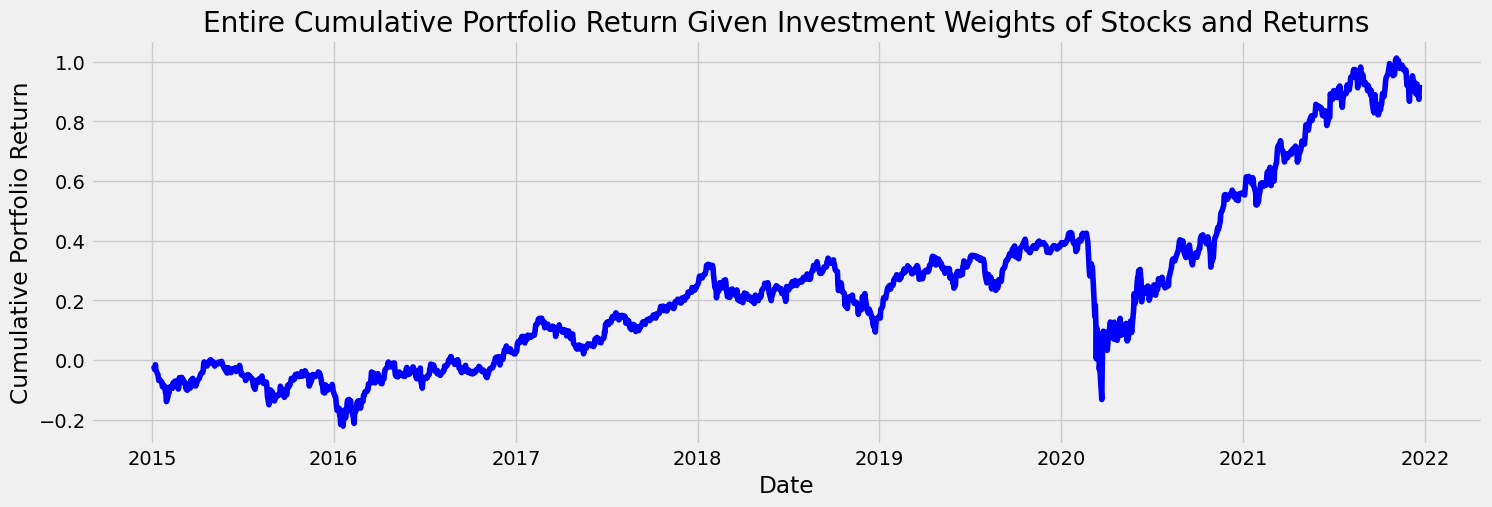

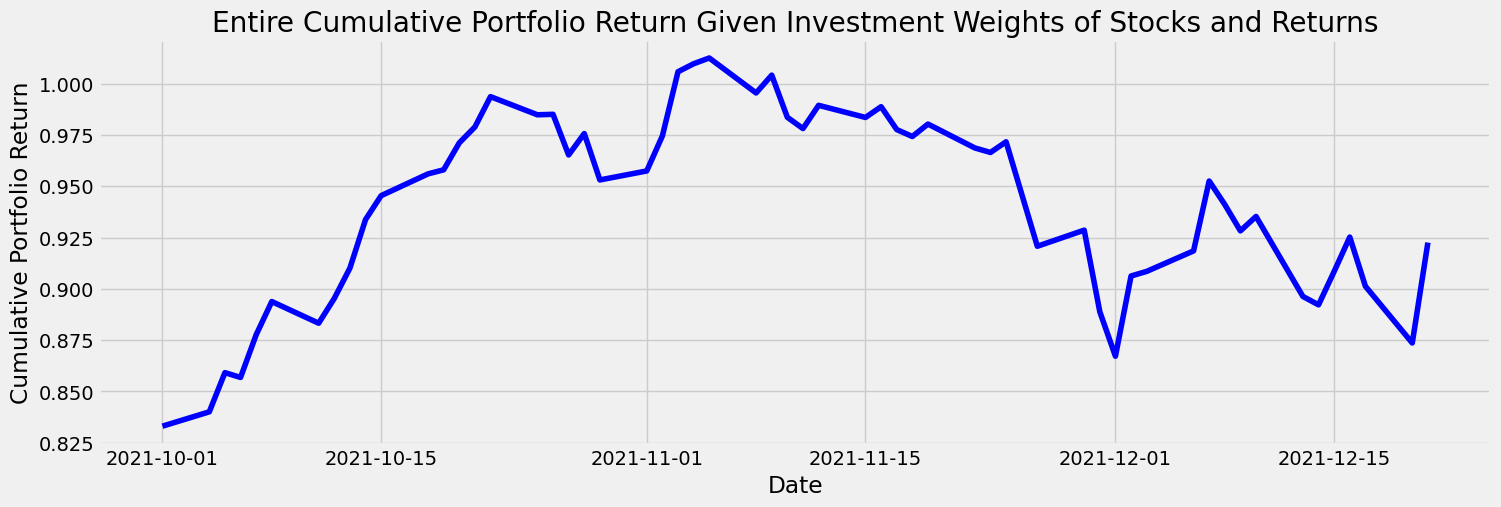

In [98]:
stock_close_returns_copy.reset_index('Date', inplace=True)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(stock_close_returns_copy['Date'], stock_close_returns_copy['Cumulative Portfolio Return'], color='blue')
title = 'Entire Cumulative Portfolio Return Given Investment Weights of Stocks and Returns'
plt.gca().set(title=title, 
              xlabel='Date', ylabel='Cumulative Portfolio Return')
plt.show()

stock_close_returns_copy.set_index('Date', inplace=True)  
stock_close_returns_short = stock_close_returns_copy.loc['2021-10-01':today_date]  # Can change starting date here
plt.figure(figsize=(16,5), dpi=100)
stock_close_returns_short.reset_index('Date', inplace=True)
plt.plot(stock_close_returns_short['Date'], stock_close_returns_short['Cumulative Portfolio Return'], color='blue')
title = 'Entire Cumulative Portfolio Return Given Investment Weights of Stocks and Returns'
plt.gca().set(title=title, 
              xlabel='Date', ylabel='Cumulative Portfolio Return')
plt.show()

In [99]:
stock_close_returns_short.set_index('Date', inplace = True)
stock_close_returns_short.head()

Symbols          NKE        RY  Portfolio Return  Cumulative Portfolio Return
Date                                                                         
2021-10-01  0.003150  0.002563          0.005713                     0.833057
2021-10-04  0.000136  0.003682          0.003818                     0.840054
2021-10-05  0.003942  0.006430          0.010372                     0.859139
2021-10-06 -0.001104 -0.000148         -0.001252                     0.856811
2021-10-07  0.005124  0.006080          0.011204                     0.877616

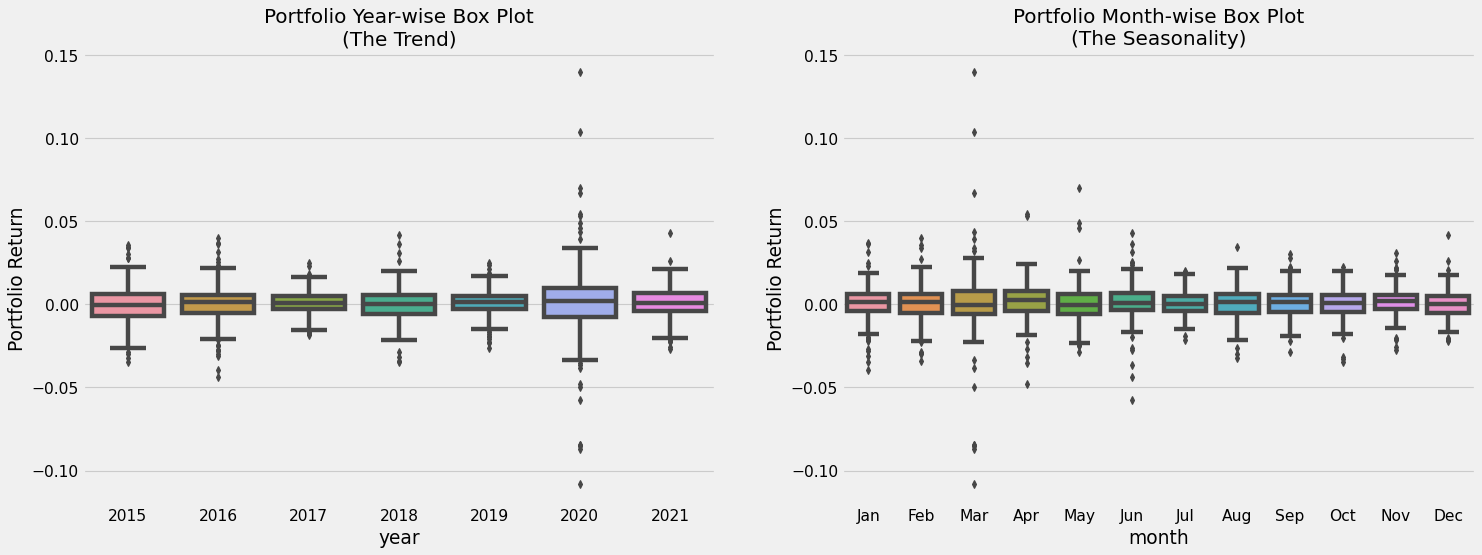

In [101]:
stock_close_returns_copy.reset_index('Date', inplace = True)
stock_close_returns_copy['year'] = [d.year for d in stock_close_returns_copy.Date]
stock_close_returns_copy['month'] = [d.strftime('%b') for d in stock_close_returns_copy.Date]
years = stock_close_returns_copy['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x=stock_close_returns_copy['year'], y=stock_close_returns_copy['Portfolio Return'], ax=axes[0])
sns.boxplot(x=stock_close_returns_copy['month'], y=stock_close_returns_copy['Portfolio Return'], 
            data=stock_close_returns_copy['Portfolio Return'].loc[~stock_close_returns_copy.year.isin([2010, 2021])])

axes_0_title = 'Portfolio Year-wise Box Plot\n(The Trend)'
axes_1_title = 'Portfolio Month-wise Box Plot\n(The Seasonality)'
axes[0].set_title(axes_0_title, fontsize=18); 
axes[1].set_title(axes_1_title, fontsize=18)
plt.show()

Portfolio Optimization

In [ ]:
# Visualizing Random Portfolios and Monte Carlo Simulation
cov_np = cov.to_numpy()
num_portfolios = 10000
D = len(mean_return)
returns = np.zeros(num_portfolios)
risks = np.zeros(num_portfolios)

random_weights = []
for i in range(num_portfolios):
  rand_range = 1.0
  w = np.random.random(D) * rand_range - rand_range / 2
  random_weights.append(w)
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk

single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)

for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

plt.scatter(risks, returns, alpha = 0.1)
plt.scatter(single_asset_risks, single_asset_returns, c = 'red')
plt.title("Return vs. Risk")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")

In [ ]:
# Maximum and Minimum Portfolio Return
from scipy.optimize import linprog
A_eq = np.ones((1,D))
b_eq = np.ones(1)
bounds = [(0, None)] * D

# minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
min_return = res.fun
print("Minimum Portfolio Return and Asset Weights: ")
print(res)
print("                 ")
print("Minimum Portfolio return: ", min_return)
print("                 ")
print("                 ")
print("                 ")

# maximize
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
max_return = -res.fun
print("Maximum Portfolio Return and Asset Weights: ")
print(res)
print("                 ")
print("Maximum Portfolio return: ", max_return)

In [ ]:
# Mean-Variance Optimal Portfolios
from scipy.optimize import minimize
n = 100
target_returns = np.linspace(min_return, max_return, num = n)

def get_portfolio_variance(weights):
  return weights.dot(cov).dot(weights)

def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target 

def portfolio_constraint(weights):
  return weights.sum() - 1
  
constraints = [{'type': 'eq', 'fun': target_return_constraint, 'args': [target_returns[0]]},
               {'type': 'eq', 'fun': portfolio_constraint}]

res = minimize(fun = get_portfolio_variance, x0 = np.ones(D) / D, method = 'SLSQP', constraints = constraints)
print(res)
print("             ")
res = minimize(fun = get_portfolio_variance, x0 = np.ones(D) / D, method = 'SLSQP', constraints = constraints, bounds = bounds)
print(res)
print("             ")

optimized_risks = []
for target in target_returns:
  constraints[0]['args'] = [target]
  res = minimize(fun = get_portfolio_variance, x0 = np.ones(D) / D, method = 'SLSQP', constraints = constraints, bounds = bounds)
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

plt.scatter(risks, returns, alpha = 0.1)
plt.plot(optimized_risks, target_returns, c = 'black')
plt.title("Efficient Frontier of Return vs. Risk")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")

In [ ]:
# Minimum Variance Portfolio
res = minimize(fun = get_portfolio_variance, x0 = np.ones(D) / D, method = 'SLSQP', constraints = {'type': 'eq', 'fun': portfolio_constraint}, 
               bounds = bounds)
print(res)
print("        ")

min_var_risk = np.sqrt(res.fun)
min_var_weights = res.x
min_var_ret = min_var_weights.dot(mean_return)

plt.scatter(risks, returns, alpha = 0.1)
plt.plot(optimized_risks, target_returns, c = 'black')
plt.scatter([min_var_risk], [min_var_ret], c = 'red')
plt.title("Minimum Variance Portfolio")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")

In [ ]:
# Sharpe Ratio 
risk_free_rate = 0.03 / 252

def neg_sharpe_ratio(weights):
  mean = weights.dot(mean_return)
  sd = np.sqrt(weights.dot(cov).dot(weights))
  return -(mean - risk_free_rate) / sd

res = minimize(fun = neg_sharpe_ratio, x0 = np.ones(D) / D, method = 'SLSQP', constraints = {'type': 'eq', 'fun': portfolio_constraint}, 
               bounds = bounds) 
print(res)
print("                    ")

best_sharpe_ratio, best_weights = -res.fun, res.x

mc_best_weights = None
mc_best_sharpe_ratio = float('-inf')
for i, (risk,ret) in enumerate(zip(risks, returns)):
  sharpe_ratio = (ret - risk_free_rate) / risk
  if sharpe_ratio > mc_best_sharpe_ratio:
    mc_best_sharpe_ratio = sharpe_ratio
    mc_best_weights = random_weights[i]     # don't know where random_weights came from
print(mc_best_weights, mc_best_sharpe_ratio)

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(risks, returns, alpha = 0.1)
# plt.plot(optimized_risks, target_returns, c = 'black')

# optimization
opt_risk = np.sqrt(best_weights.dot(cov).dot(best_weights))
opt_ret = mean_return.dot(best_weights)
plt.scatter([opt_risk], [opt_ret], c = 'red')

# monte carlo simulation
mc_opt_risk = np.sqrt(mc_best_weights.dot(cov).dot(mc_best_weights))
mc_opt_ret = mean_return.dot(mc_best_weights)
plt.scatter([mc_opt_risk], [mc_opt_ret], c = 'purple')

In [ ]:
# Risk Free Asset with Tangency Portfolio
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(risks, returns, alpha = 0.1)
plt.plot(optimized_risks, target_returns, c = 'black')

# optimization
opt_risk = np.sqrt(best_weights.dot(cov).dot(best_weights))
opt_ret = mean_return.dot(best_weights)
plt.scatter([opt_risk], [opt_ret], c = 'red')

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = opt_risk
y2 = opt_ret 
plt.plot([x1,x2], [y1,y2])

Algorithmic Trading

In [ ]:
# Trend Strategy Following
# spy_market.set_index('Date', inplace=True)
spy_market_copy = spy_market.copy()
spy_market_copy.columns = spy_market_copy.columns.get_level_values(0)
spy_market_copy['Log Return'] = spy_market_copy['Log Return'].shift(-1)
spy_market_copy.head()

In [ ]:
spy_market_copy['Slow_SMA'] = spy_market_copy['Close'].rolling(30).mean()

spy_market_copy['Fast_SMA'] = spy_market_copy['Close'].rolling(10).mean()

spy_market_copy['Signal'] = np.where(spy_market_copy['Fast_SMA'] >= spy_market_copy['Slow_SMA'], 1, 0)

spy_market_copy['Prev Signal'] = spy_market_copy['Signal'].shift(1)

spy_market_copy['Buy'] = (spy_market_copy['Prev Signal'] == 0) & (spy_market_copy['Signal'] == 1)

spy_market_copy['Sell'] = (spy_market_copy['Prev Signal'] == 1) & (spy_market_copy['Signal'] == 0)

In [ ]:
spy_market_copy[["Close", "Fast_SMA", "Slow_SMA"]].plot(figsize=(10,5))
plt.show()

spy_market_copy[["Close", "Fast_SMA", "Slow_SMA"]].iloc[:300].plot(figsize=(10,5))
plt.show()

In [ ]:
is_invested = False
def assign_is_invested(row):
  global is_invested
  if is_invested and row["Sell"]:
    is_invested = False
  if not is_invested and row["Buy"]:
    is_invested = True
  return is_invested

spy_market_copy['Is Invested'] = spy_market_copy.apply(assign_is_invested, axis = 1)

spy_market_copy['Algo Log Return'] = spy_market_copy['Is Invested'] * spy_market_copy['Log Return']

spy_market_copy.head()

In [ ]:
# Total Algo Log Return
spy_market_copy['Algo Log Return'].sum()

In [ ]:
# Total Buy and Hold Return
spy_market_copy['Log Return'].sum()

In [ ]:
spy_market_copy['Algo Log Return'].std(), spy_market_copy['Algo Log Return'].mean() / spy_market_copy['Algo Log Return'].std()

In [ ]:
spy_market_copy['Log Return'].std(), spy_market_copy['Log Return'].mean() / spy_market_copy['Log Return'].std()

In [ ]:
test_length = 1000

def trend_following(dtf, fast, slow):
  global is_invested
  dtf['Slow_SMA'] = dtf['Close'].rolling(slow).mean()
  dtf['Fast_SMA'] = dtf['Close'].rolling(fast).mean()
  dtf['Signal'] = np.where(dtf['Fast_SMA'] >= dtf['Slow_SMA'], 1, 0)
  dtf['Prev Signal'] = dtf['Signal'].shift(1)
  dtf['Buy'] = (dtf['Prev Signal'] == 0) & (dtf['Signal'] == 1)
  dtf['Sell'] = (dtf['Prev Signal'] == 1) & (dtf['Signal'] == 0)

  train = dtf.iloc[:-test_length]
  test = dtf.iloc[-test_length:]

  is_invested = False
  dtf.loc[:-test_length, "Is Invested"] = train.apply(assign_is_invested, axis = 1)
  dtf.loc[:-test_length, "Algo Log Return"] = train["Is Invested"] * train["Log Return"]

  is_invested = False
  dtf.loc[-test_length:, "Is Invested"] = test.apply(assign_is_invested, axis = 1)
  dtf.loc[-test_length:, "Algo Log Return"] = test["Is Invested"] * test["Log Return"]

  return train["Algo Log Return"][:-1].sum(), test["Algo Log Return"][:-1].sum()

In [ ]:
trend_following(spy_market_copy, 10, 30)

In [ ]:
# Grid Search
best_fast = None
best_slow = None
best_score = float('-inf')
for fast in range(3,30):
  for slow in range(fast + 5, 80):
    score, _ = trend_following(spy_market_copy, fast, slow)
    if score > best_score:
      best_fast = fast
      best_slow = slow
      best_score = score
best_fast, best_slow, trend_following(spy_market_copy, best_fast, best_slow)

In [ ]:
train = spy_market_copy.iloc[:-test_length].copy()
test = spy_market_copy.iloc[-test_length:].copy()

In [ ]:
# Total Buy and Hold Return Train
train["Log Return"][:-1].sum()

In [ ]:
# Total Buy and Hold Return Test
test["Log Return"][:-1].sum()

In [ ]:
# Sharpe Ratio Algo vs. Sharpe Ratio Buy and Hold Train
train["Algo Log Return"].mean() / train["Algo Log Return"].std(), train["Log Return"].mean() / train["Log Return"].std()

In [ ]:
# Sharpe Ratio Algo vs. Sharpe Ratio Buy and Hold Test
test["Algo Log Return"].mean() / test["Algo Log Return"].std(), test["Log Return"].mean() / test["Log Return"].std()

In [ ]:
# Wealth Over Time
train["Cumulative Log Return"] = train["Algo Log Return"].cumsum().shift(1)
train["Cumulative Wealth"] = train.iloc[0]["Close"] * np.exp(train["Cumulative Log Return"])
train[["Close", "Slow_SMA", "Fast_SMA", "Cumulative Wealth"]].plot(figsize=(20,10))

In [ ]:
# Machine Based Models to Predict Returns of Stocks
df_returns = pd.concat([df["Return"], spy_market["Return"]], axis = 1)
df_returns = df_returns.shift(-1)[:-1]
df_returns.rename(columns = {'Return': 'SPY'}, inplace = True)
df_returns.tail()

In [ ]:
test_length = 1000
train = df_returns.iloc[:-test_length]
test = df_returns.iloc[-test_length:]

In [ ]:
X_train = train.drop('SPY', axis = 1)
y_train = train["SPY"]
X_test = test.drop('SPY', axis = 1)
y_test = test['SPY']

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
np.mean(np.sign(pred_train) == np.sign(y_train)), np.mean(np.sign(pred_test) == np.sign(y_test)) 

In [ ]:
set(np.sign(pred_train)), set(np.sign(pred_test))

In [ ]:
df_returns["Position"] = 0
df_returns.loc[:-test_length, "Position"] = (pred_train > 0)
df_returns.loc[-test_length:, "Position"] = (pred_test > 0)

df_returns["Algo Return"] = df_returns["Position"] * df_returns["SPY"]

In [ ]:
# Total Algo Log Train Return
df_returns.iloc[:-test_length]["Algo Return"].sum()

In [ ]:
# Total Algo Log Test Return
df_returns.iloc[-test_length:]["Algo Return"].sum()

In [ ]:
# Total Buy and Hold Train
y_train.sum()

In [ ]:
# Total Buy and Hold Test
y_test.sum()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)
c_train = (y_train > 0)
c_test = (y_test > 0)
model.fit(X_train, c_train)
model.score(X_train, c_train), model.score(X_test, c_test)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
set(pred_train), set(pred_test)

In [ ]:
df_returns["Position"] = 0
df_returns.loc[:-test_length, "Position"] = (pred_train > 0)
df_returns.loc[-test_length:, "Position"] = (pred_test > 0)

df_returns["Algo Return"] = df_returns["Position"] * df_returns["SPY"]

In [ ]:
# Total Algo Log Train Return
df_returns.iloc[:-test_length]["Algo Return"].sum()

In [ ]:
# Total Algo Log Test Return
df_returns.iloc[-test_length:]["Algo Return"].sum()

In [ ]:
# Total Buy and Hold Train
y_train.sum()

In [ ]:
# Total Buy and Hold Test
y_test.sum()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, c_train)
model.score(X_train, c_train), model.score(X_test, c_test)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
df_returns.loc[:-test_length, "Position"] = pred_train
df_returns.loc[-test_length:, "Position"] = pred_test

df_returns["Algo Return"] = df_returns["Position"] * df_returns["SPY"]

In [ ]:
# Total Algo Log Return Train
df_returns.iloc[:-test_length]["Algo Return"].sum()

In [ ]:
# Total Algo Log Return Test
df_returns.iloc[-test_length:]["Algo Return"].sum()

In [ ]:
# Total Return Buy and Hold 
y_train.sum(), y_test.sum()

Extras

In [ ]:
# Hidden Markov Model (HMM) for Volatility Clustering of Stock Returns
# !pip install hmmlearn

In [ ]:
# from hmmlearn import hmm
# np.random.seed(1)
# df_aapl = pd.concat([df["Adj Close"]["AAPL"], df["Close"]["AAPL"], df["High"]["AAPL"], df["Log Return"]["AAPL"], 
#                      df["Low"]["AAPL"], df["Open"]["AAPL"], df["Return"]["AAPL"], df["Volume"]["AAPL"]], axis = 1)
# df_aapl.columns = ["Adj Close", "Close", "High", "Log Return", "Low", "Open", "Return", "Volume"]
# df_aapl.head()

In [ ]:
# df_returns = df_aapl["Log Return"]
# df_returns.dropna(inplace=True)
# df_returns.hist(bins = 100, density = True)

In [ ]:
# model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
# X = df_returns.to_numpy().reshape(-1, 1)
# model.fit(X)

In [ ]:
# Z = model.predict(X)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))
# plt.subplot(211)
# plt.plot(Z)
# plt.subplot(212)
# plt.plot(returns)

In [ ]:
# # we want to draw different segments in different colors according to state
# fig, ax = plt.subplots(figsize=(10, 5))

# # first create arrays with nan
# returns0 = np.empty(len(Z))
# returns1 = np.empty(len(Z))
# returns0[:] = np.nan
# returns1[:] = np.nan

# # fill in the values only if the state is the one corresponding to the array
# returns0[Z == 0] = df_returns[Z == 0]
# returns1[Z == 1] = df_returns[Z == 1]
# plt.plot(returns0, label='state 0')
# plt.plot(returns1, label='state 1')
# plt.legend()

In [ ]:
# transition matrix
# model.transmat_

In [ ]:
# try to set the transition matrix intuitively
# model.transmat_ = np.array([
#   [0.999, 0.001],
#   [0.001, 0.999],                           
# ])

In [ ]:
# run inference again
# Z = model.predict(X)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))
# plt.subplot(211)
# plt.plot(Z)
# plt.subplot(212)
# plt.plot(returns)

In [ ]:
# # we want to draw different segments in different colors according to state
# fig, ax = plt.subplots(figsize=(10, 5))

# # first create arrays with nan
# returns0 = np.empty(len(Z))
# returns1 = np.empty(len(Z))
# returns0[:] = np.nan
# returns1[:] = np.nan

# # fill in the values only if the state is the one corresponding to the array
# returns0[Z == 0] = df_returns[Z == 0]
# returns1[Z == 1] = df_returns[Z == 1]
# plt.plot(returns0, label='state 0')
# plt.plot(returns1, label='state 1')
# plt.legend()